## Data Collection

Predict 'Tesla' stock price movements

**Tweets**

*   Stock prices & Social media mentions - https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction?select=stock_tweets.csv


**News Headlines**

In [1]:
!pip install requests

In [2]:
import re
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime

headers = {
    "Cookie": "AJOT2_SessionId=pggqus1ldfo0bwzneawsxjev; American_Occupational_Therapy_AssociationMachineID=638465226214394544; _ga=GA1.3.913198106.1710925824; _gid=GA1.3.1309327130.1710925824; hubspotutk=45c7ea6f7f9bc84af981be5458cbd84f; __hssrc=1; _gcl_au=1.1.585721882.1710925826; _ga=GA1.1.913198106.1710925824; fpestid=4kF3LjnaKNrsHvB8tW4_YKTLTPNsD6vCuAlY0WCMKU5aAwe6XWWv6UtXpHzRbXLsSv41wA; _fbp=fb.1.1710925826667.1584579234; sa-user-id=s%253A0-e2678d88-10ca-5085-6e7f-9699543ec39e.aIOhjYU93e7TrKIeWR6gMMmTxJ02LKzL9HBy03tu1O8; sa-user-id-v2=s%253A4meNiBDKUIVuf5aZVD7DnsD4CYs.VtEorakjnt%252FJQzeCUbY79ctfGiblf2HOIqPboSWhdv8; sa-user-id-v3=s%253AAQAKIDXsHk-nPieIBwxcewSN2DK_yU_oPgQnkfXYHwGkT2yaEAEYAyCIiJCuBjABOgQhyhL0QgRXNvD_.c4W0g0ObZSPQuXL6BfKED0nlq%252BmsAqIVpcRJoitHQOc; _clck=1vryupj%7C2%7Cfk9%7C0%7C1540; AOTATest=ok; visid_incap_531175=Zy2nzuSmR5yFKFg6O/LRzFEC/GUAAAAAQUIPAAAAAAAwq1h6OkWoDAVnjInquuek; incap_ses_1789_531175=z+8RXSSzxndaBkzgDs7TGFIC/GUAAAAAadGLWY1wNHMxfyo/d3eR9w==; __hstc=204606671.45c7ea6f7f9bc84af981be5458cbd84f.1710925825505.1711010287800.1711014485331.3; __hssc=204606671.3.1711014485331; _uetsid=b08c93e0e69911ee8a2b1968b6f72485; _uetvid=b08cc970e69911ee91acfbf279c55fdb; _clsk=f67khb%7C1711015485276%7C7%7C1%7Ck.clarity.ms%2Fcollect; _ga_3CVRFYYS90=GS1.1.1711012705.3.1.1711015489.58.0.0",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}
def get_soup(url):
    response = requests.get(url,headers=headers)
    soup= BeautifulSoup(response.content, 'html.parser')
    return soup
def get_content(url):
    content=requests.get(url).content
    soup = BeautifulSoup(content, 'html.parser')
    return soup.text
data=[]
num_pages=270
offset = 0
for page in range(num_pages):
    url = f'https://www.reuters.com/pf/api/v3/content/fetch/articles-by-search-v2?query=%7B%22keyword%22%3A%22tesla%22%2C%22offset%22%3A{offset}%2C%22orderby%22%3A%22display_date%3Adesc%22%2C%22size%22%3A20%2C%22website%22%3A%22reuters%22%7D&d=190&_website=reuters'
    soup = json.loads(get_content(url))
    articles_info = [(article['title'], article['updated_time']) for article in soup['result']['articles']]

    for title, updated_time in articles_info:
        formatted_date = datetime.strptime(updated_time, '%Y-%m-%dT%H:%M:%S.%fZ').strftime('%Y-%m-%d')
        print(f"title='{title}', updated_time='{formatted_date}'")
        data.append({"title": title, "updated_time": formatted_date})

    df1 = pd.DataFrame(data)
    df1.to_csv('tesla_news.csv', index=False)
    print("Data has been successfully saved to tesla_news.csv")
    offset += 20

Streaming output truncated to the last 5000 lines.
Data has been successfully saved to tesla_news.csv
title='S&P 500 hits fresh closing high ahead of Fed meeting, big tech earnings', updated_time='2024-01-29'
title='GM looks for a road out of Tesla's shadow', updated_time='2024-01-29'
title='Weak Intel forecast drags S&P 500, ends streak of record highs', updated_time='2024-01-26'
title='Elon Musk says his AI startup xAI not raising capital', updated_time='2024-01-26'
title='Tesla to recall 200,000 vehicles in US to fix rearview glitch - NHTSA', updated_time='2024-01-26'
title='Electric car maker Polestar to cut around 450 jobs globally', updated_time='2024-01-26'
title='Autoliv predicts higher margins after Q4 profit beats estimates', updated_time='2024-01-26'
title='Morning Bid: PCE in our time as US economy impresses', updated_time='2024-01-26'
title='S&P 500 extends streak of record highs; Tesla tumbles', updated_time='2024-01-26'
title='Battery maker LG Energy Solution projects sl

**Historical Prices of Tesla**

In [5]:
# prompt: scrape TSLA stock prices from 2021-09-30 to 2024-05-19 from yfinance

import yfinance as yf
import pandas as pd

# Define the ticker symbol and date range
ticker_symbol = "TSLA"
start_date = "2021-09-30"
end_date = "2024-05-19"

# Use yfinance to download historical data
historical_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Convert the data to a Pandas DataFrame
df2 = pd.DataFrame(historical_data)
df2

# Save the DataFrame to a CSV file
df2.to_csv('historical_stock_prices.csv', index=True)

[*********************100%%**********************]  1 of 1 completed


In [7]:
df2

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   
2021-10-06  258.733337  262.220001  257.739990  260.916656  260.916656   
...                ...         ...         ...         ...         ...   
2024-05-13  170.000000  175.399994  169.000000  171.889999  171.889999   
2024-05-14  174.500000  179.490005  174.070007  177.550003  177.550003   
2024-05-15  179.899994  180.000000  173.110001  173.990005  173.990005   
2024-05-16  174.100006  175.789993  171.429993  174.839996  174.839996   
2024-05-17  173.550003  179.630005  172.750000  177.460007  177.460007   

              Volume  
Date                  
2021-09-30  53868000  
2021-10-01  51094200  
2021-10-04  91449900  
2021-10-05  55297800  
2021-10-06  43898400  
...              ...  
2024-05-13  67018900  
2024-05-14  86407400  
2024-05-15  79663000  
2024-05-16  59812200  
2024-05-17  77445800  

[662 rows x 6 columns]

## Data Preprocessing

In [8]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

**Text Data - Tweets**

In [9]:
df = pd.read_csv("tesla_tweets.csv")
df.head()

Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.  
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.  
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.  
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.  
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.

In [10]:
df.dtypes

Date            object
Tweet           object
Stock Name      object
Company Name    object
dtype: object

In [11]:
df.shape

(80793, 4)

In [12]:
# Filter the dataframe for rows where the company is 'Tesla'
df = df[df['Company Name'] == 'Tesla, Inc.'].copy()
df

Date  \
0      2022-09-29 23:41:16+00:00   
1      2022-09-29 23:24:43+00:00   
2      2022-09-29 23:18:08+00:00   
3      2022-09-29 22:40:07+00:00   
4      2022-09-29 22:27:05+00:00   
...                          ...   
37417  2021-09-30 02:52:38+00:00   
37418  2021-09-30 02:40:26+00:00   
37419  2021-09-30 01:59:02+00:00   
37420  2021-09-30 01:38:26+00:00   
37421  2021-09-30 01:16:13+00:00   

                                                   Tweet Stock Name  \
0      Mainstream media has done an amazing job at br...       TSLA   
1      Tesla delivery estimates are at around 364k fr...       TSLA   
2      3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3      @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4      @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   
...                                                  ...        ...   
37417  Playing in the dirt and #chasingsunsets\n@tesl...       TSLA   
37418  I agree with @freshjiva that $TSLA ‘s EV busin...       TSLA   
37419                             Hold. On. Tight. $TSLA       TSLA   
37420  Get ready for a $TSLA _ _ _ _ _ _  Q3 delivery...       TSLA   
37421  In other words, AMD has been giving Tesla pref...       TSLA   

      Company Name  
0      Tesla, Inc.  
1      Tesla, Inc.  
2      Tesla, Inc.  
3      Tesla, Inc.  
4      Tesla, Inc.  
...            ...  
37417  Tesla, Inc.  
37418  Tesla, Inc.  
37419  Tesla, Inc.  
37420  Tesla, Inc.  
37421  Tesla, Inc.  

[37422 rows x 4 columns]

In [13]:
df.shape

(37422, 4)

In [14]:
# Convert "Published Date" to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date            datetime64[ns, UTC]
Tweet                        object
Stock Name                   object
Company Name                 object
dtype: object

In [15]:
# Format the 'Date' column to include only the date part (yyyy-mm-dd)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df.head()

Date                                              Tweet Stock Name  \
0  2022-09-29  Mainstream media has done an amazing job at br...       TSLA   
1  2022-09-29  Tesla delivery estimates are at around 364k fr...       TSLA   
2  2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3  2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4  2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   

  Company Name  
0  Tesla, Inc.  
1  Tesla, Inc.  
2  Tesla, Inc.  
3  Tesla, Inc.  
4  Tesla, Inc.

In [16]:
df.shape

(37422, 4)

In [17]:
# Remove repeated rows
df = df.drop_duplicates()

df.shape

(37413, 4)

In [18]:
df.isnull().sum()

Date            0
Tweet           0
Stock Name      0
Company Name    0
dtype: int64

In [19]:
df.drop(['Stock Name', 'Company Name'], axis=1, inplace=True)
df.head()

<ipython-input-19-cba4765805bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Stock Name', 'Company Name'], axis=1, inplace=True)


Date                                              Tweet
0  2022-09-29  Mainstream media has done an amazing job at br...
1  2022-09-29  Tesla delivery estimates are at around 364k fr...
2  2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...
3  2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...
4  2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Before Preprocessing...

In [21]:
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize

# Function to plot frequent punctuation marks
def plot_punctuation_frequency(text, top_n=20):
    # Find all punctuation marks
    punctuation = re.findall(r'[^\w\s]', text)
    # Count the frequency of each punctuation mark
    punctuation_count = Counter(punctuation)
    # Get the most common punctuation marks
    most_common_punctuation = punctuation_count.most_common(top_n)
    # Unpack the keys and values for plotting
    keys, values = zip(*most_common_punctuation)
    # Plot the frequency
    plt.figure(figsize=(18, 6))
    plt.bar(keys, values)
    plt.xlabel('Punctuation Marks')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Most Frequent Punctuation Marks')
    plt.show()

# Function to plot frequent stop words
def plot_stopwords_frequency(text, top_n=20):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Find stop words
    stop_words = set(stopwords.words('english'))
    stop_words_found = [word for word in tokens if word in stop_words]
    # Count the frequency of each stop word
    stop_words_count = Counter(stop_words_found)
    # Get the most common stop words
    most_common_stopwords = stop_words_count.most_common(top_n)
    # Unpack the keys and values for plotting
    keys, values = zip(*most_common_stopwords)
    # Plot the frequency
    plt.figure(figsize=(18, 6))
    plt.bar(keys, values)
    plt.xlabel('Stop Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Most Frequent Stop Words')
    plt.show()

# Function to generate word cloud
def generate_word_cloud(text):
    wordcloud = WordCloud(width=1200, height=600,
                          background_color='white',
                          stopwords=set(stopwords.words('english')),
                          min_font_size=10).generate(text)
    plt.figure(figsize=(8, 10), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

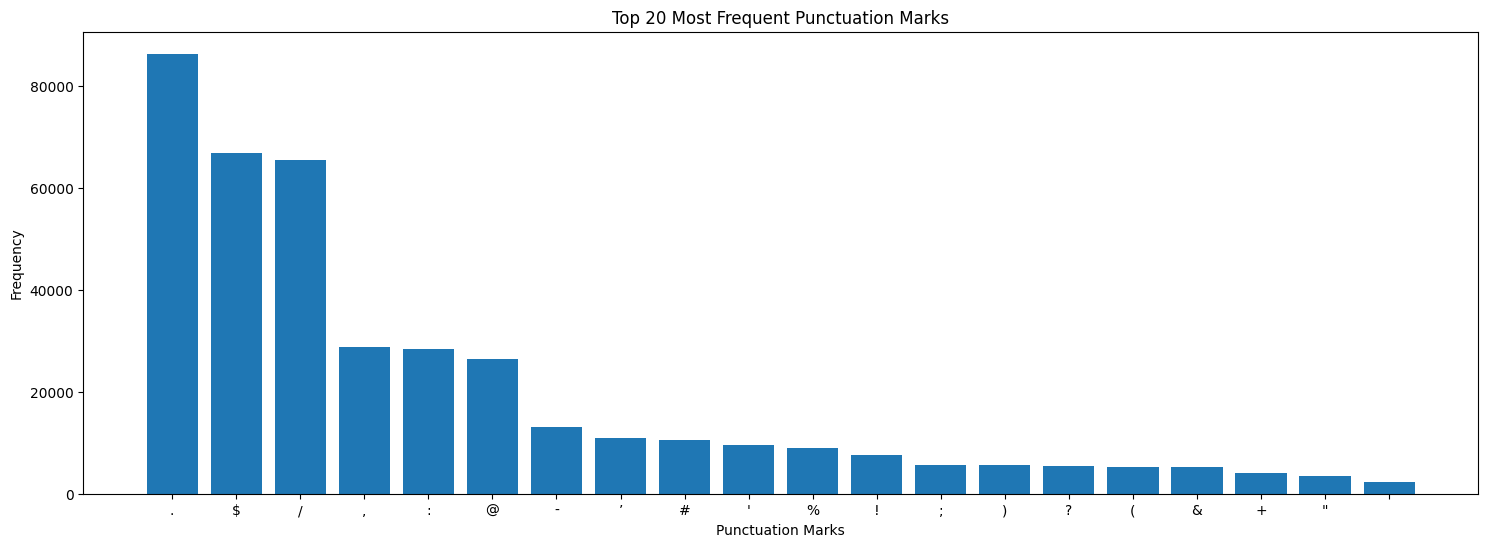

In [22]:
# Visualize punctuation frequency
text = ' '.join(df['Tweet'])
plot_punctuation_frequency(text)

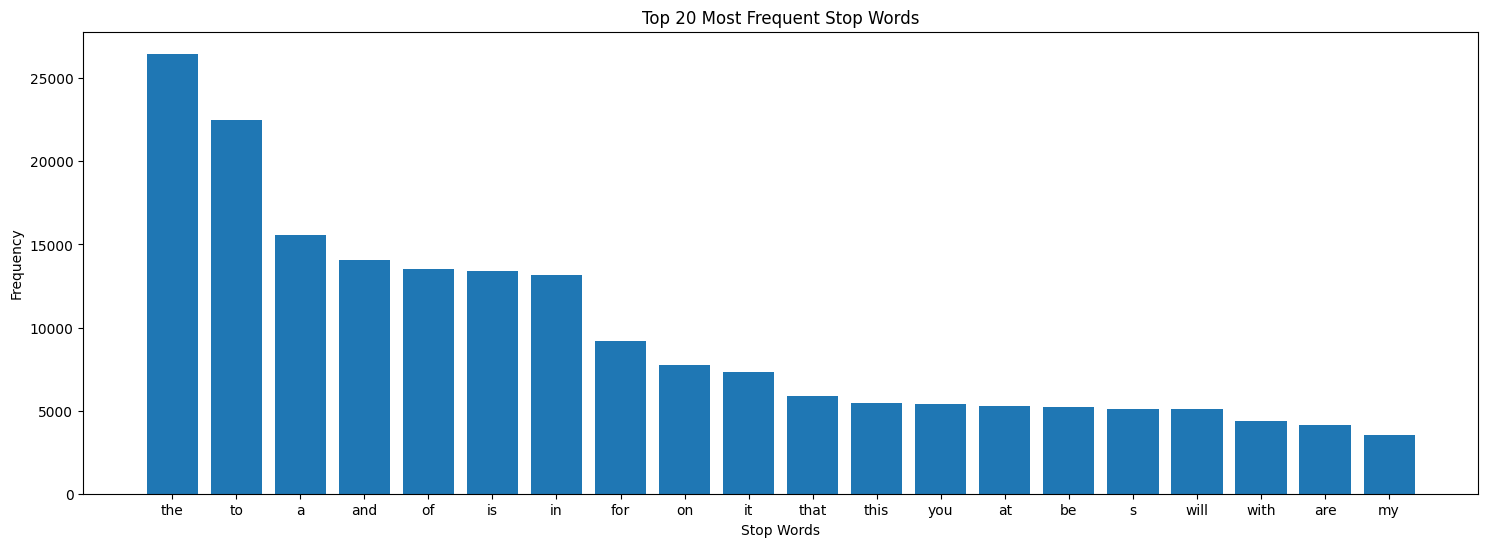

In [23]:
# Visualize stop words frequency
plot_stopwords_frequency(text)

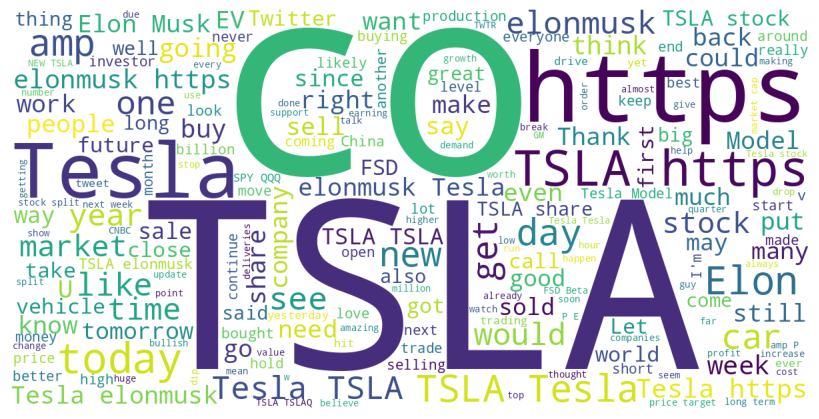

In [24]:
# Generate word cloud
generate_word_cloud(text)

Removing mentions and links from the tweets

In [25]:
# Function to clean tweets
def clean_tweet(tweet):
    # Remove mentioned words
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove links
    tweet = re.sub(r'http\S+|www.\S+', '', tweet)
    # Remove extra spaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Apply the cleaning function to the 'Tweet' column
df['Cleaned Tweet'] = df['Tweet'].apply(clean_tweet)

# Display the modified dataframe
df[['Date', 'Tweet', 'Cleaned Tweet']]

<ipython-input-25-a74c81e3874f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned Tweet'] = df['Tweet'].apply(clean_tweet)


Date                                              Tweet  \
0      2022-09-29  Mainstream media has done an amazing job at br...   
1      2022-09-29  Tesla delivery estimates are at around 364k fr...   
2      2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...   
3      2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...   
4      2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...   
...           ...                                                ...   
37417  2021-09-30  Playing in the dirt and #chasingsunsets\n@tesl...   
37418  2021-09-30  I agree with @freshjiva that $TSLA ‘s EV busin...   
37419  2021-09-30                             Hold. On. Tight. $TSLA   
37420  2021-09-30  Get ready for a $TSLA _ _ _ _ _ _  Q3 delivery...   
37421  2021-09-30  In other words, AMD has been giving Tesla pref...   

                                           Cleaned Tweet  
0      Mainstream media has done an amazing job at br...  
1      Tesla delivery estimates are at around 364k fr...  
2      3/ Even if I include 63.0M unvested RSUs as of...  
3      Hahaha why are you still trying to stop Tesla ...  
4      Stop trying to kill kids, you sad deranged old...  
...                                                  ...  
37417            Playing in the dirt and #chasingsunsets  
37418  I agree with that $TSLA ‘s EV business alone i...  
37419                             Hold. On. Tight. $TSLA  
37420  Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery ...  
37421  In other words, AMD has been giving Tesla pref...  

[37413 rows x 3 columns]

Lowecasing & Removing punctuations and stopwords & Lemmatization

In [26]:
from nltk import pos_tag

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # POS tagging
    pos_tags = pos_tag(filtered_tokens)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = []
    for word, tag in pos_tags:
        if tag.startswith('NN'):  # Noun
            lemma = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('VB'):  # Verb
            lemma = lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):  # Adjective
            lemma = lemmatizer.lemmatize(word, pos='a')
        else:
            lemma = word
        lemmatized_text.append(lemma)
    # Join the lemmatized tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_text)
    return preprocessed_text

# Apply preprocessing to 'Title' and 'Content' columns
df['Cleaned Tweet'] = df['Cleaned Tweet'].apply(preprocess_text)

# Display the preprocessed DataFrame
df

<ipython-input-26-04db43ba880b>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned Tweet'] = df['Cleaned Tweet'].apply(preprocess_text)


Date                                              Tweet  \
0      2022-09-29  Mainstream media has done an amazing job at br...   
1      2022-09-29  Tesla delivery estimates are at around 364k fr...   
2      2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...   
3      2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...   
4      2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...   
...           ...                                                ...   
37417  2021-09-30  Playing in the dirt and #chasingsunsets\n@tesl...   
37418  2021-09-30  I agree with @freshjiva that $TSLA ‘s EV busin...   
37419  2021-09-30                             Hold. On. Tight. $TSLA   
37420  2021-09-30  Get ready for a $TSLA _ _ _ _ _ _  Q3 delivery...   
37421  2021-09-30  In other words, AMD has been giving Tesla pref...   

                                           Cleaned Tweet  
0      mainstream medium do amazing job brainwash peo...  
1          tesla delivery estimate around k analyst tsla  
2      even include unvested rsus additional equity n...  
3      hahaha still try stop tesla fsd bro get shit t...  
4                  stop try kill kid sad derange old man  
...                                                  ...  
37417                           play dirt chasingsunsets  
37418  agree tsla ev business alone worth gt sh wo fs...  
37419                                    hold tight tsla  
37420  get ready tsla _ _ _ _ _ _ q delivery number u...  
37421  word amd give tesla preferential treatment bc ...  

[37413 rows x 3 columns]

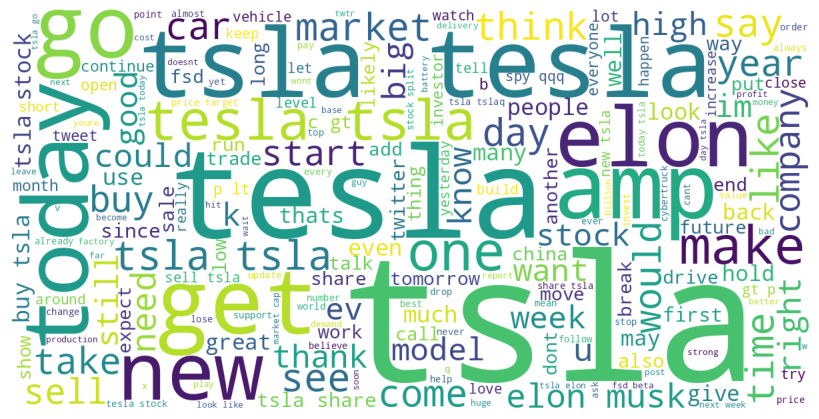

In [27]:
# Generate word cloud
text = ' '.join(df['Cleaned Tweet'])
generate_word_cloud(text)

In [28]:
# Function to clean tweets
def clean_tweet(tweet):
    # Remove 'tsla' and 'tesla' (case-insensitive)
    tweet = re.sub(r'\b(tsla|tesla)\b', '', tweet, flags=re.IGNORECASE)
    # Remove extra spaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Apply the cleaning function to the 'Tweet' column
df['Cleaned Tweet'] = df['Cleaned Tweet'].apply(clean_tweet)

# Display the modified dataframe
df[['Date', 'Tweet', 'Cleaned Tweet']]

<ipython-input-28-d09bbf052268>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned Tweet'] = df['Cleaned Tweet'].apply(clean_tweet)


Date                                              Tweet  \
0      2022-09-29  Mainstream media has done an amazing job at br...   
1      2022-09-29  Tesla delivery estimates are at around 364k fr...   
2      2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...   
3      2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...   
4      2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...   
...           ...                                                ...   
37417  2021-09-30  Playing in the dirt and #chasingsunsets\n@tesl...   
37418  2021-09-30  I agree with @freshjiva that $TSLA ‘s EV busin...   
37419  2021-09-30                             Hold. On. Tight. $TSLA   
37420  2021-09-30  Get ready for a $TSLA _ _ _ _ _ _  Q3 delivery...   
37421  2021-09-30  In other words, AMD has been giving Tesla pref...   

                                           Cleaned Tweet  
0      mainstream medium do amazing job brainwash peo...  
1                     delivery estimate around k analyst  
2      even include unvested rsus additional equity n...  
3      hahaha still try stop fsd bro get shit togethe...  
4                  stop try kill kid sad derange old man  
...                                                  ...  
37417                           play dirt chasingsunsets  
37418  agree ev business alone worth gt sh wo fsd lik...  
37419                                         hold tight  
37420  get ready _ _ _ _ _ _ q delivery number ur answer  
37421  word amd give preferential treatment bc know l...  

[37413 rows x 3 columns]

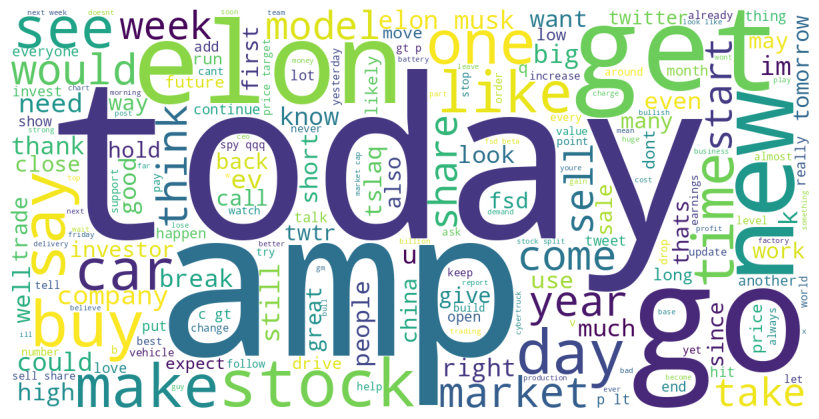

In [29]:
# Generate word cloud
text = ' '.join(df['Cleaned Tweet'])
generate_word_cloud(text)

In [30]:
df.to_csv('preprocessed_tweets.csv', index=False)

**Text Data - News**

In [31]:
import re
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime

In [32]:
df1 = pd.read_csv('tesla_news.csv')
df1.head()

title updated_time
0  Proxy firm advises shareholders to reject Elon...   2024-05-26
1  Kabosu, the face of cryptocurrency Dogecoin, d...   2024-05-24
2  US, Canadian companies kick off 2024 with layoffs   2024-05-24
3  Lucid to trim US workforce by 6% amid softenin...   2024-05-24
4  Tesla drops delivery goal of 20 million vehicl...   2024-05-24

In [33]:
df1.dtypes

title           object
updated_time    object
dtype: object

In [34]:
df1.shape

(5380, 2)

In [35]:
# Convert "Published Date" to datetime format
df1['updated_time'] = pd.to_datetime(df1['updated_time'])
df1.dtypes

title                   object
updated_time    datetime64[ns]
dtype: object

In [36]:
# Remove repeated rows
df1 = df1.drop_duplicates()

In [37]:
df1.shape

(5366, 2)

In [38]:
df1.isnull().sum()

title           0
updated_time    0
dtype: int64

In [39]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Before Preprocessing...

In [40]:
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize

# Function to plot frequent punctuation marks
def plot_punctuation_frequency(text, top_n=20):
    # Find all punctuation marks
    punctuation = re.findall(r'[^\w\s]', text)
    # Count the frequency of each punctuation mark
    punctuation_count = Counter(punctuation)
    # Get the most common punctuation marks
    most_common_punctuation = punctuation_count.most_common(top_n)
    # Unpack the keys and values for plotting
    keys, values = zip(*most_common_punctuation)
    # Plot the frequency with bright colors
    plt.figure(figsize=(18, 6))
    plt.bar(keys, values, color='skyblue')
    plt.xlabel('Punctuation Marks', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Top {top_n} Most Frequent Punctuation Marks', fontsize=16)
    plt.xticks()
    plt.yticks()
    plt.show()

# Function to plot frequent stop words
def plot_stopwords_frequency(text, top_n=20):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Find stop words
    stop_words = set(stopwords.words('english'))
    stop_words_found = [word for word in tokens if word in stop_words]
    # Count the frequency of each stop word
    stop_words_count = Counter(stop_words_found)
    # Get the most common stop words
    most_common_stopwords = stop_words_count.most_common(top_n)
    # Unpack the keys and values for plotting
    keys, values = zip(*most_common_stopwords)
    # Plot the frequency with bright colors
    plt.figure(figsize=(18, 6))
    plt.bar(keys, values, color='purple')
    plt.xlabel('Stop Words', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Top {top_n} Most Frequent Stop Words', fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks()
    plt.show()

# Function to generate word cloud with bright colors
def generate_word_cloud(text):
    wordcloud = WordCloud(width=1200, height=600,
                          background_color='white',
                          colormap='viridis',
                          stopwords=set(stopwords.words('english')),
                          min_font_size=10).generate(text)
    plt.figure(figsize=(10, 6), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

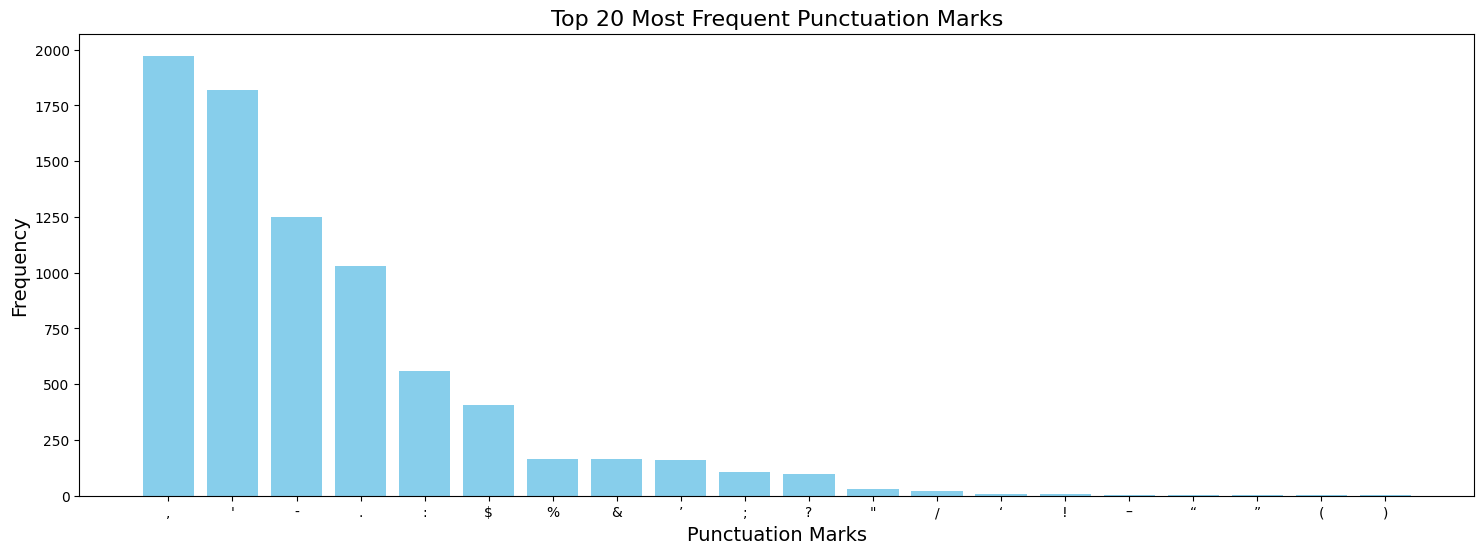

In [41]:
plot_punctuation_frequency(df1['title'].str.cat(sep=' '))

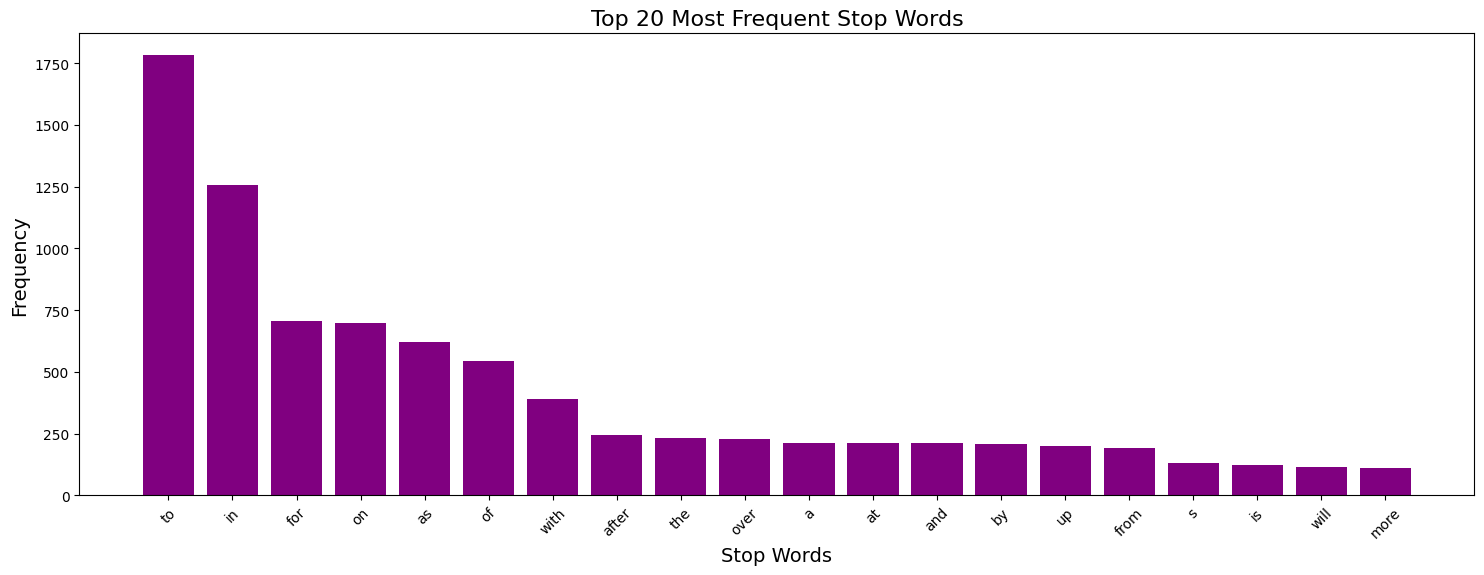

In [42]:
# Visualize stop words frequency
text = ' '.join(df1['title'])
plot_stopwords_frequency(text)

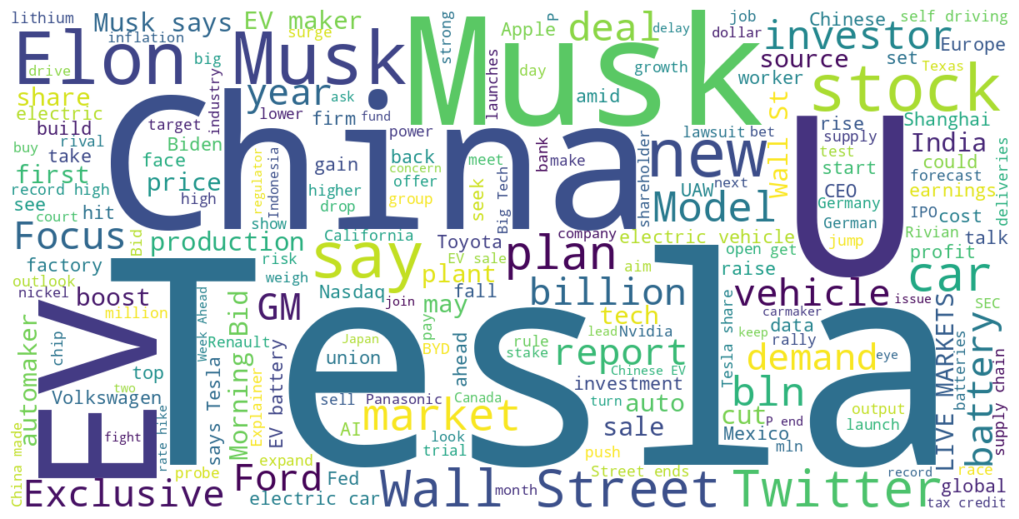

In [43]:
# Generate word cloud
generate_word_cloud(text)

Lowecasing & Removing punctuations and stopwords & Lemmatization

In [44]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # POS tagging
    pos_tags = pos_tag(filtered_tokens)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = []
    for word, tag in pos_tags:
        if tag.startswith('NN'):  # Noun
            lemma = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('VB'):  # Verb
            lemma = lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):  # Adjective
            lemma = lemmatizer.lemmatize(word, pos='a')
        else:
            lemma = word
        lemmatized_text.append(lemma)
    # Join the lemmatized tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_text)
    return preprocessed_text

# Apply preprocessing to 'Title' and 'Content' columns
df1['title'] = df1['title'].apply(preprocess_text)

# Display the preprocessed DataFrame
df1

title updated_time
0     proxy firm advise shareholder reject elon musk...   2024-05-26
1     kabosu face cryptocurrency dogecoin die owner say   2024-05-24
2                       us canadian company kick layoff   2024-05-24
3         lucid trim us workforce amid soften ev demand   2024-05-24
4     tesla drop delivery goal million vehicle year ...   2024-05-24
...                                                 ...          ...
5375   us firm gm lockheed aim moon lunar rover venture   2021-05-26
5376  german police investigate possible arson tesla...   2021-05-26
5377  china ev maker li auto expect monthly sale rea...   2021-05-26
5378  tesla double camerabased autopilot amid grow s...   2021-05-26
5379  exclusive ford follow gm vw two new dedicate e...   2021-05-25

[5366 rows x 2 columns]

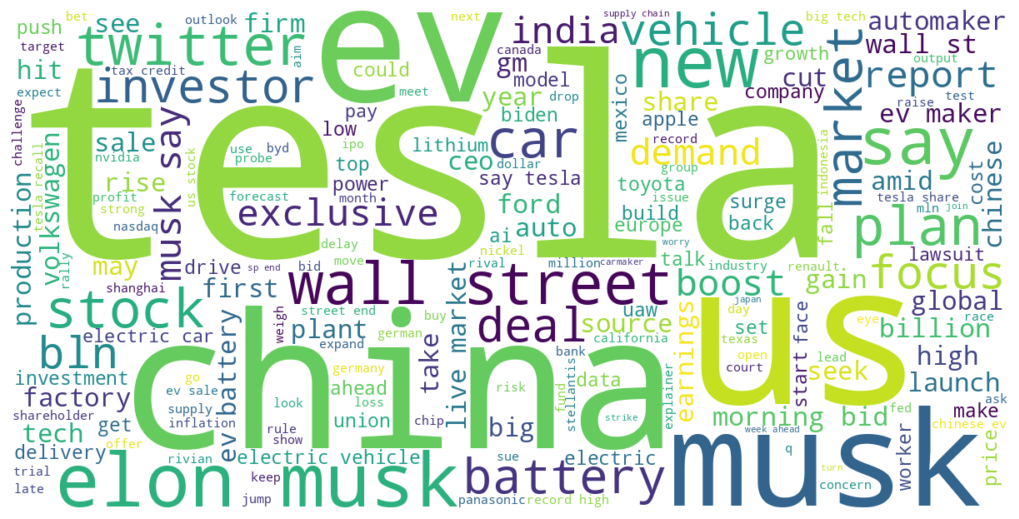

In [45]:
# Generate word cloud
text = ' '.join(df1['title'])
generate_word_cloud(text)

In [46]:
# Function to clean news
def clean_news(news):
    # Remove 'tsla' and 'tesla' (case-insensitive)
    title = re.sub(r'\b(tsla|tesla)\b', '', news, flags=re.IGNORECASE)
    # Remove extra spaces
    title = re.sub(r'\s+', ' ', news).strip()
    return title

# Apply the cleaning function to the 'Tweet' column
df1['title'] = df1['title'].apply(clean_news)

# Display the modified dataframe
df1

title updated_time
0     proxy firm advise shareholder reject elon musk...   2024-05-26
1     kabosu face cryptocurrency dogecoin die owner say   2024-05-24
2                       us canadian company kick layoff   2024-05-24
3         lucid trim us workforce amid soften ev demand   2024-05-24
4     tesla drop delivery goal million vehicle year ...   2024-05-24
...                                                 ...          ...
5375   us firm gm lockheed aim moon lunar rover venture   2021-05-26
5376  german police investigate possible arson tesla...   2021-05-26
5377  china ev maker li auto expect monthly sale rea...   2021-05-26
5378  tesla double camerabased autopilot amid grow s...   2021-05-26
5379  exclusive ford follow gm vw two new dedicate e...   2021-05-25

[5366 rows x 2 columns]

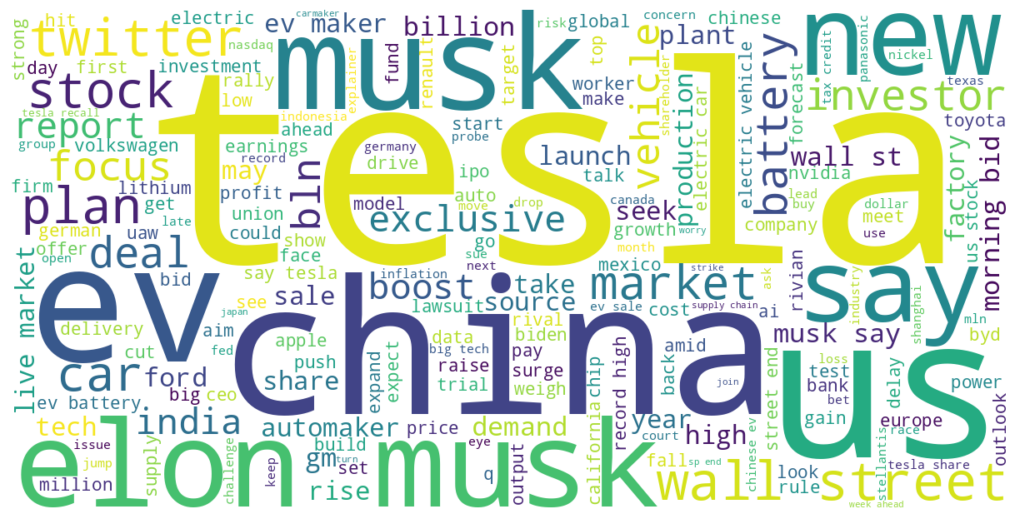

In [47]:
# Generate word cloud
text = ' '.join(df1['title'])
generate_word_cloud(text)

In [48]:
df1.shape

(5366, 2)

In [49]:
df1.to_csv('preprocessed_news.csv', index=False)

**Historical Prices of Tesla**

In [50]:
df2 = pd.read_csv("historical_stock_prices.csv")
df2.head()

Date        Open        High         Low       Close   Adj Close  \
0  2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
1  2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
2  2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
3  2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   
4  2021-10-06  258.733337  262.220001  257.739990  260.916656  260.916656   

     Volume  
0  53868000  
1  51094200  
2  91449900  
3  55297800  
4  43898400

In [51]:
df2.shape

(662, 7)

In [52]:
df2.drop(['Open', 'High', 'Low', 'Close'], axis=1, inplace=True)
df2.head()

Date   Adj Close    Volume
0  2021-09-30  258.493347  53868000
1  2021-10-01  258.406677  51094200
2  2021-10-04  260.510010  91449900
3  2021-10-05  260.196655  55297800
4  2021-10-06  260.916656  43898400

In [53]:
df2.shape

(662, 3)

In [54]:
df2.dtypes

Date          object
Adj Close    float64
Volume         int64
dtype: object

In [55]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.dtypes

Date         datetime64[ns]
Adj Close           float64
Volume                int64
dtype: object

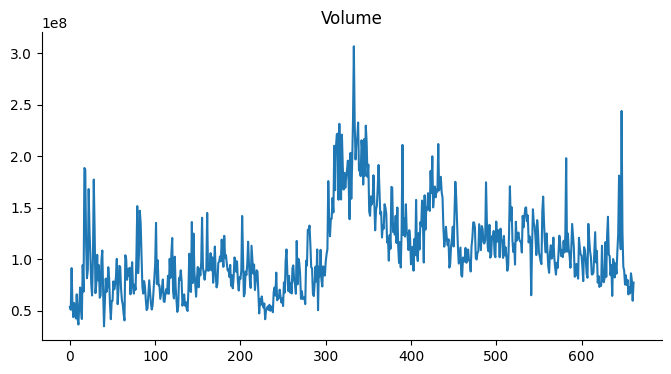

In [56]:
# Visualize Volume
from matplotlib import pyplot as plt
df2['Volume'].plot(kind='line', figsize=(8, 4), title='Volume')
plt.gca().spines[['top', 'right']].set_visible(False)

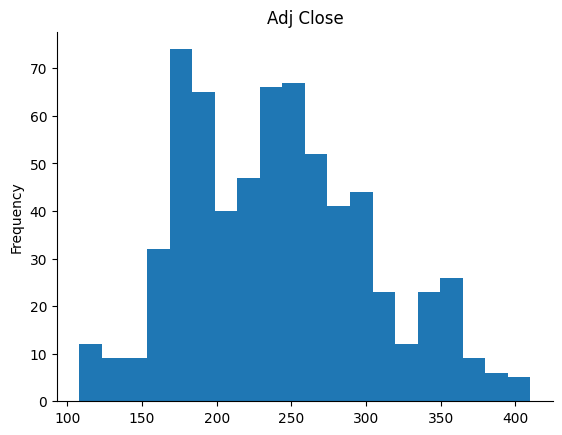

In [57]:
from matplotlib import pyplot as plt
df2['Adj Close'].plot(kind='hist', bins=20, title='Adj Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

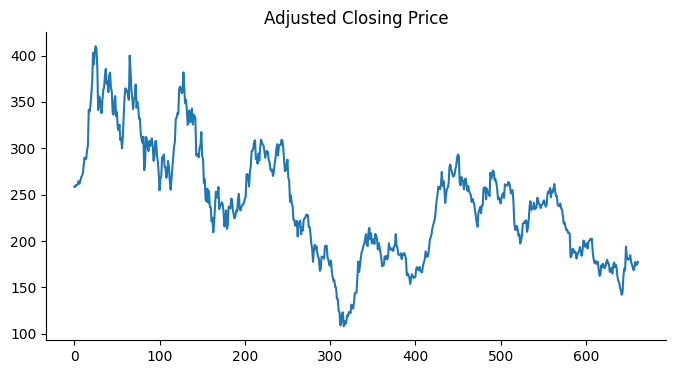

In [58]:
df2['Adj Close'].plot(kind='line', figsize=(8, 4), title='Adjusted Closing Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [59]:
df2.isnull().sum()

Date         0
Adj Close    0
Volume       0
dtype: int64

In [60]:
df2.to_csv('preprocessed_stock_prices.csv', index=False)

# Sentiment Analysis

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('preprocessed_tweets.csv')
df1 = pd.read_csv('preprocessed_news.csv')

In [63]:
print(df.dtypes)
print(df1.dtypes)

Date             object
Tweet            object
Cleaned Tweet    object
dtype: object
title           object
updated_time    object
dtype: object


In [64]:
df1.rename(columns={'updated_time': 'Date', 'title': 'News'}, inplace=True)

Analyse sentiment using 3 approaches



1.   Utilizing Pre-trained Sentiment Analysis Models

Objective: Apply sentiment analysis techniques to extract sentiment scores from the textual data.

Tool: VADER (Valence Aware Dictionary and sEntiment Reasoner)

2.   Building Custom Sentiment Analysis Models Using Machine Learning Techniques

Objective: Build custom sentiment analysis models using machine learning techniques.

 Tool: Naive Bayes classifier trained on a labeled dataset

3.   Incorporating Sentiment Lexicons

Objective: Incorporate sentiment lexicons to extract sentiment scores.

Tool: AFINN (Affective Norms for English Words)





**1. Utilizing Pre-trained Sentiment Analysis Models**


*   **Perform Sentiment Analysis on Tweets using VADER**




In [65]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


Apply VADER sentiment analysis on the Tweets

In [66]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Ensure all entries in 'Cleaned Tweet' column are strings
df['Cleaned Tweet'] = df['Cleaned Tweet'].astype(str)

# Apply VADER sentiment analysis on the tweets data with 'Date' and 'Cleaned Tweet' columns
df['Tweet Sentiment'] = df['Cleaned Tweet'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

neutral_threshold = 0.0

# Function to label sentiment scores
def label_sentiment(score):
    if score == neutral_threshold:
        return 'Neutral'
    elif score > neutral_threshold:
        return 'Positive'
    else:
        return 'Negative'

# Apply labeling to the 'Tweet Sentiment' column
df['Tweet Sentiment Label'] = df['Tweet Sentiment'].apply(label_sentiment)

# Display the resulting dataframe with tweet sentiment scores
df[['Date', 'Cleaned Tweet', 'Tweet Sentiment', 'Tweet Sentiment Label']]

Date                                      Cleaned Tweet  \
0      2022-09-29  mainstream medium do amazing job brainwash peo...   
1      2022-09-29                 delivery estimate around k analyst   
2      2022-09-29  even include unvested rsus additional equity n...   
3      2022-09-29  hahaha still try stop fsd bro get shit togethe...   
4      2022-09-29              stop try kill kid sad derange old man   
...           ...                                                ...   
37408  2021-09-30                           play dirt chasingsunsets   
37409  2021-09-30  agree ev business alone worth gt sh wo fsd lik...   
37410  2021-09-30                                         hold tight   
37411  2021-09-30  get ready _ _ _ _ _ _ q delivery number ur answer   
37412  2021-09-30  word amd give preferential treatment bc know l...   

       Tweet Sentiment Tweet Sentiment Label  
0               0.4019              Positive  
1               0.0000               Neutral  
2               0.2960              Positive  
3              -0.3400              Negative  
4              -0.8750              Negative  
...                ...                   ...  
37408           0.0000               Neutral  
37409           0.6743              Positive  
37410           0.0000               Neutral  
37411           0.4215              Positive  
37412           0.4019              Positive  

[37413 rows x 4 columns]



*   **Perform Sentiment Analysis on News Headlines using VADER**




In [67]:
# Apply VADER sentiment analysis on the news data with 'Date' and 'News' columns
df1['News Sentiment'] = df1['News'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

neutral_threshold = 0.0

# Function to label sentiment scores
def label_sentiment(score):
    if score == neutral_threshold:
        return 'Neutral'
    elif score > neutral_threshold:
        return 'Positive'
    else:
        return 'Negative'

# Apply labeling to the 'News Sentiment' column
df1['News Sentiment Label'] = df1['News Sentiment'].apply(label_sentiment)

# Display the resulting dataframe with news sentiment scores
df1[['Date', 'News', 'News Sentiment', 'News Sentiment Label']]

Date                                               News  \
0     2024-05-26  proxy firm advise shareholder reject elon musk...   
1     2024-05-24  kabosu face cryptocurrency dogecoin die owner say   
2     2024-05-24                    us canadian company kick layoff   
3     2024-05-24      lucid trim us workforce amid soften ev demand   
4     2024-05-24  tesla drop delivery goal million vehicle year ...   
...          ...                                                ...   
5361  2021-05-26   us firm gm lockheed aim moon lunar rover venture   
5362  2021-05-26  german police investigate possible arson tesla...   
5363  2021-05-26  china ev maker li auto expect monthly sale rea...   
5364  2021-05-26  tesla double camerabased autopilot amid grow s...   
5365  2021-05-25  exclusive ford follow gm vw two new dedicate e...   

      News Sentiment News Sentiment Label  
0            -0.4767             Negative  
1            -0.5994             Negative  
2             0.0000              Neutral  
3            -0.1280             Negative  
4            -0.2732             Negative  
...              ...                  ...  
5361          0.0000              Neutral  
5362          0.0000              Neutral  
5363          0.0258             Positive  
5364          0.0000              Neutral  
5365          0.1280             Positive  

[5366 rows x 4 columns]



**2.   Building Custom Sentiment Analysis Models Using Machine Learning Techniques**



*   **Train a Custom Sentiment Analysis Model for Tweets**





In [68]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [69]:
# Load the labelled tweets dataset from CSV
tweets_labelled_df = pd.read_csv('Labelled Tweets.csv')

tweets_labelled_df.head()

id                 created_at  \
0   1  2020-04-09 23:59:51+00:00   
1   2  2020-04-09 23:58:55+00:00   
2   3  2020-04-09 23:58:52+00:00   
3   4  2020-04-09 23:58:27+00:00   
4   5  2020-04-09 23:57:59+00:00   

                                           full_text  score  
0  @KennyDegu very very little volume. With $10T ...   -0.7  
1  #ES_F achieved Target 2780 closing above 50% #...    0.0  
2  RT @KimbleCharting: Silver/Gold indicator crea...   -0.2  
3  @Issaquahfunds Hedged our $MSFT position into ...   -0.4  
4  RT @zipillinois: 3 Surprisingly Controversial ...    0.1

In [70]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [71]:
# Function to preprocess the text
def preprocess_text(text):
    # Remove mentions (@), hashtags (#), and URLs
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lower case
    text = text.lower()
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # POS tagging
    pos_tags = pos_tag(filtered_tokens)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = []
    for word, tag in pos_tags:
        if tag.startswith('NN'):  # Noun
            lemma = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('VB'):  # Verb
            lemma = lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):  # Adjective
            lemma = lemmatizer.lemmatize(word, pos='a')
        else:
            lemma = word
        lemmatized_text.append(lemma)
    # Join the lemmatized tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_text)
    return preprocessed_text
    return text

# Apply preprocessing to 'full_text' column
tweets_labelled_df['cleaned_text'] = tweets_labelled_df['full_text'].apply(preprocess_text)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

# Convert 'score' to numeric
tweets_labelled_df['score'] = pd.to_numeric(tweets_labelled_df['score'], errors='coerce')

# Drop rows with missing values
tweets_labelled_df.dropna(inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(tweets_labelled_df['full_text'], \
                                                                   tweets_labelled_df['score'], test_size=0.2, random_state=42)

# Build a pipeline with a CountVectorizer and a Linear Regression model
model = make_pipeline(CountVectorizer(), LinearRegression())

# Train the model
model.fit(train_data, train_labels)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('linearregression', LinearRegression())])

In [73]:
# Apply the model to the tweets dataset
df['Custom Tweets Sentiment Scores'] = model.predict(df['Tweet'])

# Define thresholds for sentiment categories
def categorize_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply labeling to the predicted scores
df['Custom Tweets Sentiment Labels'] = df['Custom Tweets Sentiment Scores'].apply(categorize_sentiment)

df[['Date', 'Cleaned Tweet', 'Custom Tweets Sentiment Scores', 'Custom Tweets Sentiment Labels']]

Date                                      Cleaned Tweet  \
0      2022-09-29  mainstream medium do amazing job brainwash peo...   
1      2022-09-29                 delivery estimate around k analyst   
2      2022-09-29  even include unvested rsus additional equity n...   
3      2022-09-29  hahaha still try stop fsd bro get shit togethe...   
4      2022-09-29              stop try kill kid sad derange old man   
...           ...                                                ...   
37408  2021-09-30                           play dirt chasingsunsets   
37409  2021-09-30  agree ev business alone worth gt sh wo fsd lik...   
37410  2021-09-30                                         hold tight   
37411  2021-09-30  get ready _ _ _ _ _ _ q delivery number ur answer   
37412  2021-09-30  word amd give preferential treatment bc know l...   

       Custom Tweets Sentiment Scores Custom Tweets Sentiment Labels  
0                            0.683358                       positive  
1                           -0.094422                       negative  
2                            1.167162                       positive  
3                           -0.705485                       negative  
4                           -0.800493                       negative  
...                               ...                            ...  
37408                        0.247036                       positive  
37409                       -0.248053                       negative  
37410                        0.157599                       positive  
37411                        0.961607                       positive  
37412                        0.092445                       positive  

[37413 rows x 4 columns]

*   **Train a Custom Sentiment Analysis Model for News**

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

# Load the news sentiment dataset from CSV
news_labelled_df = pd.read_csv('Labelled_news_sentiment.csv')
news_labelled_df.head()

published_at  \
0  2021-10-21T14:40:39+00:00   
1  2021-10-21T13:52:13+00:00   
2  2021-10-21T12:45:52+00:00   
3  2021-10-21T12:40:35+00:00   
4  2021-10-21T11:43:53+00:00   

                                               title  \
0  Exclusive: Industrialist Nikhil Merchant leads...   
1  India’s Reliance gets shareholders’ nod to add...   
2          Rogers misses quarterly revenue estimates   
3  Exclusive: Tycoon Nikhil Merchant leads race f...   
4  BP to Open Fuel Station in India Amid Record P...   

                                         description  \
0  Low-profile Gujarat businessman wants to add P...   
1  BENGALURU &#8212; India&#8217;s Reliance Indus...   
2  Rogers Communications Inc reported third-quart...   
3  Low-profile Gujarat businessman wants to add P...   
4  BP and Reliance Industries signed a $6 billion...   

                                                 url sentiment  \
0  https://www.businesstoday.in/latest/corporate/...   neutral   
1  https://financialpost.com/pmn/business-pmn/ind...   neutral   
2  https://torontosun.com/business/money-news/rog...  negative   
3  https://www.businesstoday.in/latest/corporate/...   neutral   
4  https://sputniknews.com/20211021/bp-to-open-fu...  positive   

   sentiment_score  
0         0.711336  
1         0.800176  
2         0.973185  
3         0.619371  
4         0.929962

In [75]:
# Preprocess the news sentiment dataset
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # POS tagging
    pos_tags = pos_tag(filtered_tokens)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = []
    for word, tag in pos_tags:
        if tag.startswith('NN'):  # Noun
            lemma = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('VB'):  # Verb
            lemma = lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):  # Adjective
            lemma = lemmatizer.lemmatize(word, pos='a')
        else:
            lemma = word
        lemmatized_text.append(lemma)
    # Join the lemmatized tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_text)
    return preprocessed_text

# Apply preprocessing to 'title' column
news_labelled_df['title'] = news_labelled_df['title'].apply(preprocess_text)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(news_labelled_df['title'], \
                                                                    news_labelled_df['sentiment_score'], test_size=0.2, random_state=42)

# Build a pipeline with a CountVectorizer and a Linear Regression model
model = make_pipeline(CountVectorizer(), LinearRegression())

# Train the model
model.fit(train_data, train_labels)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('linearregression', LinearRegression())])

In [76]:
# Apply the model to the news dataset
df1['Custom News Sentiment Scores'] = model.predict(df1['News'])

# Define thresholds for sentiment categories
def categorize_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply labeling to the predicted scores
df1['Custom News Sentiment Labels'] = df1['Custom News Sentiment Scores'].apply(categorize_sentiment)

df1[['Date', 'News', 'Custom News Sentiment Scores', 'Custom News Sentiment Labels']]

Date                                               News  \
0     2024-05-26  proxy firm advise shareholder reject elon musk...   
1     2024-05-24  kabosu face cryptocurrency dogecoin die owner say   
2     2024-05-24                    us canadian company kick layoff   
3     2024-05-24      lucid trim us workforce amid soften ev demand   
4     2024-05-24  tesla drop delivery goal million vehicle year ...   
...          ...                                                ...   
5361  2021-05-26   us firm gm lockheed aim moon lunar rover venture   
5362  2021-05-26  german police investigate possible arson tesla...   
5363  2021-05-26  china ev maker li auto expect monthly sale rea...   
5364  2021-05-26  tesla double camerabased autopilot amid grow s...   
5365  2021-05-25  exclusive ford follow gm vw two new dedicate e...   

      Custom News Sentiment Scores Custom News Sentiment Labels  
0                         0.837206                     positive  
1                         0.946797                     positive  
2                         0.753200                     positive  
3                         0.754492                     positive  
4                         0.801062                     positive  
...                            ...                          ...  
5361                      0.907372                     positive  
5362                      0.835402                     positive  
5363                      0.750325                     positive  
5364                      0.908793                     positive  
5365                      0.614812                     positive  

[5366 rows x 4 columns]

**3. Incorporating Sentiment Lexicons**



*   **Incorporating Sentiment Lexicons for Tweets**




In [77]:
from textblob import TextBlob

def get_sentiment_textblob(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive', polarity
    elif polarity < 0:
        return 'Negative', polarity
    else:
        return 'Neutral', polarity

In [78]:
# Apply sentiment lexicon analysis on tweets
df['TB Tweets Sentiment Labels'], df['TB Tweets Sentiment'] = zip(*df['Cleaned Tweet'].apply(get_sentiment_textblob))
df

Date                                              Tweet  \
0      2022-09-29  Mainstream media has done an amazing job at br...   
1      2022-09-29  Tesla delivery estimates are at around 364k fr...   
2      2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...   
3      2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...   
4      2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...   
...           ...                                                ...   
37408  2021-09-30  Playing in the dirt and #chasingsunsets\n@tesl...   
37409  2021-09-30  I agree with @freshjiva that $TSLA ‘s EV busin...   
37410  2021-09-30                             Hold. On. Tight. $TSLA   
37411  2021-09-30  Get ready for a $TSLA _ _ _ _ _ _  Q3 delivery...   
37412  2021-09-30  In other words, AMD has been giving Tesla pref...   

                                           Cleaned Tweet  Tweet Sentiment  \
0      mainstream medium do amazing job brainwash peo...           0.4019   
1                     delivery estimate around k analyst           0.0000   
2      even include unvested rsus additional equity n...           0.2960   
3      hahaha still try stop fsd bro get shit togethe...          -0.3400   
4                  stop try kill kid sad derange old man          -0.8750   
...                                                  ...              ...   
37408                           play dirt chasingsunsets           0.0000   
37409  agree ev business alone worth gt sh wo fsd lik...           0.6743   
37410                                         hold tight           0.0000   
37411  get ready _ _ _ _ _ _ q delivery number ur answer           0.4215   
37412  word amd give preferential treatment bc know l...           0.4019   

      Tweet Sentiment Label  Custom Tweets Sentiment Scores  \
0                  Positive                        0.683358   
1                   Neutral                       -0.094422   
2                  Positive                        1.167162   
3                  Negative                       -0.705485   
4                  Negative                       -0.800493   
...                     ...                             ...   
37408               Neutral                        0.247036   
37409              Positive                       -0.248053   
37410               Neutral                        0.157599   
37411              Positive                        0.961607   
37412              Positive                        0.092445   

      Custom Tweets Sentiment Labels TB Tweets Sentiment Labels  \
0                           positive                   Positive   
1                           negative                    Neutral   
2                           positive                   Positive   
3                           negative                   Positive   
4                           negative                   Negative   
...                              ...                        ...   
37408                       positive                    Neutral   
37409                       negative                   Negative   
37410                       positive                   Negative   
37411                       positive                   Positive   
37412                       positive                   Positive   

       TB Tweets Sentiment  
0                 0.550000  
1                 0.000000  
2                 0.136364  
3                 0.160000  
4                -0.200000  
...                    ...  
37408             0.000000  
37409            -0.166667  
37410            -0.178571  
37411             0.200000  
37412             0.214286  

[37413 rows x 9 columns]

*   **Incorporating Sentiment Lexicons for News**

In [79]:
# Apply sentiment lexicon analysis on News
df1['TB News Sentiment Labels'], df1['TB News Sentiment'] = zip(*df1['News'].apply(get_sentiment_textblob))
df1

News        Date  \
0     proxy firm advise shareholder reject elon musk...  2024-05-26   
1     kabosu face cryptocurrency dogecoin die owner say  2024-05-24   
2                       us canadian company kick layoff  2024-05-24   
3         lucid trim us workforce amid soften ev demand  2024-05-24   
4     tesla drop delivery goal million vehicle year ...  2024-05-24   
...                                                 ...         ...   
5361   us firm gm lockheed aim moon lunar rover venture  2021-05-26   
5362  german police investigate possible arson tesla...  2021-05-26   
5363  china ev maker li auto expect monthly sale rea...  2021-05-26   
5364  tesla double camerabased autopilot amid grow s...  2021-05-26   
5365  exclusive ford follow gm vw two new dedicate e...  2021-05-25   

      News Sentiment News Sentiment Label  Custom News Sentiment Scores  \
0            -0.4767             Negative                      0.837206   
1            -0.5994             Negative                      0.946797   
2             0.0000              Neutral                      0.753200   
3            -0.1280             Negative                      0.754492   
4            -0.2732             Negative                      0.801062   
...              ...                  ...                           ...   
5361          0.0000              Neutral                      0.907372   
5362          0.0000              Neutral                      0.835402   
5363          0.0258             Positive                      0.750325   
5364          0.0000              Neutral                      0.908793   
5365          0.1280             Positive                      0.614812   

     Custom News Sentiment Labels TB News Sentiment Labels  TB News Sentiment  
0                        positive                 Negative          -0.200000  
1                        positive                  Neutral           0.000000  
2                        positive                  Neutral           0.000000  
3                        positive                  Neutral           0.000000  
4                        positive                 Negative          -0.300000  
...                           ...                      ...                ...  
5361                     positive                 Negative          -0.200000  
5362                     positive                  Neutral           0.000000  
5363                     positive                  Neutral           0.000000  
5364                     positive                  Neutral           0.000000  
5365                     positive                 Positive           0.136364  

[5366 rows x 8 columns]

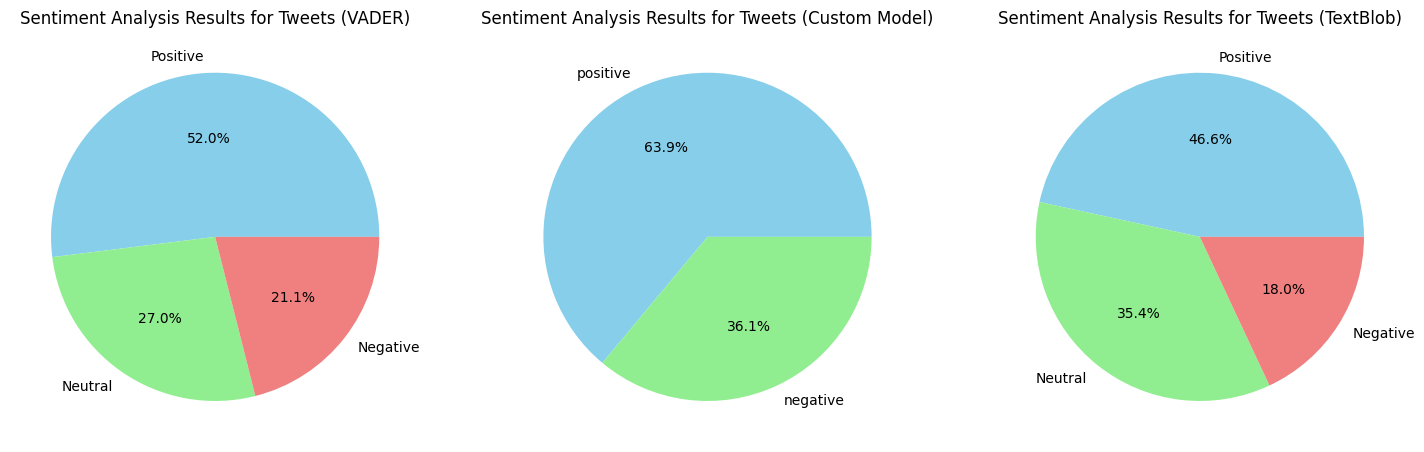

In [80]:
import matplotlib.pyplot as plt

# Create subplots for the first three pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Calculate sentiment percentages for each approach
vader_sentiment_counts = df['Tweet Sentiment Label'].value_counts(normalize=True) * 100
custom_sentiment_counts = df['Custom Tweets Sentiment Labels'].value_counts(normalize=True) * 100
textblob_sentiment_counts = df['TB Tweets Sentiment Labels'].value_counts(normalize=True) * 100

# Plot the sentiment percentages as pie charts
axes[0].pie(vader_sentiment_counts, labels=vader_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
axes[0].set_title('Sentiment Analysis Results for Tweets (VADER)')

axes[1].pie(custom_sentiment_counts, labels=custom_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
axes[1].set_title('Sentiment Analysis Results for Tweets (Custom Model)')

axes[2].pie(textblob_sentiment_counts, labels=textblob_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
axes[2].set_title('Sentiment Analysis Results for Tweets (TextBlob)')

plt.show()

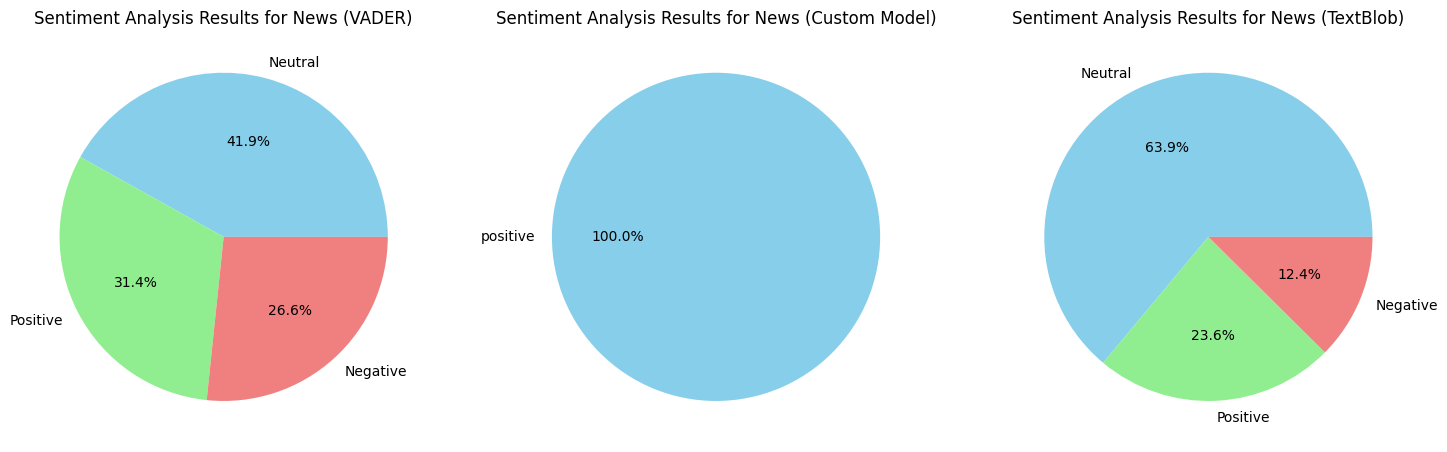

In [81]:
import matplotlib.pyplot as plt

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Calculate sentiment percentages for each approach
vader_sentiment_counts_news = df1['News Sentiment Label'].value_counts(normalize=True) * 100
custom_sentiment_counts_news = df1['Custom News Sentiment Labels'].value_counts(normalize=True) * 100
texblob_sentiment_counts_news = df1['TB News Sentiment Labels'].value_counts(normalize=True) * 100

# Plot the sentiment percentages as pie charts
axes[0].pie(vader_sentiment_counts_news, labels=vader_sentiment_counts_news.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
axes[0].set_title('Sentiment Analysis Results for News (VADER)')

axes[1].pie(custom_sentiment_counts_news, labels=custom_sentiment_counts_news.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
axes[1].set_title('Sentiment Analysis Results for News (Custom Model)')

axes[2].pie(texblob_sentiment_counts_news, labels=texblob_sentiment_counts_news.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
axes[2].set_title('Sentiment Analysis Results for News (TextBlob)')

plt.show()

Calculate Overall Sentiment Score

In [82]:
print(df.dtypes)
print(df1.dtypes)

Date                               object
Tweet                              object
Cleaned Tweet                      object
Tweet Sentiment                   float64
Tweet Sentiment Label              object
Custom Tweets Sentiment Scores    float64
Custom Tweets Sentiment Labels     object
TB Tweets Sentiment Labels         object
TB Tweets Sentiment               float64
dtype: object
News                             object
Date                             object
News Sentiment                  float64
News Sentiment Label             object
Custom News Sentiment Scores    float64
Custom News Sentiment Labels     object
TB News Sentiment Labels         object
TB News Sentiment               float64
dtype: object


In [83]:
# Convert dates to datetime
df['Date'] = pd.to_datetime(df['Date']).dt.date
df1['Date'] = pd.to_datetime(df1['Date']).dt.date

# Aggregate daily sentiment for tweets
daily_tweets_sentiment = df.groupby('Date').agg({'TB Tweets Sentiment': 'mean'})

# Aggregate daily sentiment for news
daily_news_sentiment = df1.groupby('Date').agg({'TB News Sentiment': 'mean'})

# Combine daily sentiment
combined_sentiment = pd.merge(daily_tweets_sentiment, daily_news_sentiment, on='Date', how='outer')

# Calculate weighted average overall score
combined_sentiment['Overall Score'] = combined_sentiment[['TB Tweets Sentiment', 'TB News Sentiment']].mean(axis=1)

combined_sentiment.head()

TB Tweets Sentiment  TB News Sentiment  Overall Score
Date                                                             
2021-09-30             0.110358           0.100000       0.105179
2021-10-01             0.120895          -0.003077       0.058909
2021-10-02             0.139813           0.000000       0.069907
2021-10-03             0.147334                NaN       0.147334
2021-10-04             0.070195           0.135052       0.102624

In [84]:
combined_sentiment.to_csv('combined_sentiment.csv', index=True)

Combining the sentiment with Historical Prices

In [85]:
df = pd.read_csv('combined_sentiment.csv')
df.head()

Date  TB Tweets Sentiment  TB News Sentiment  Overall Score
0  2021-09-30             0.110358           0.100000       0.105179
1  2021-10-01             0.120895          -0.003077       0.058909
2  2021-10-02             0.139813           0.000000       0.069907
3  2021-10-03             0.147334                NaN       0.147334
4  2021-10-04             0.070195           0.135052       0.102624

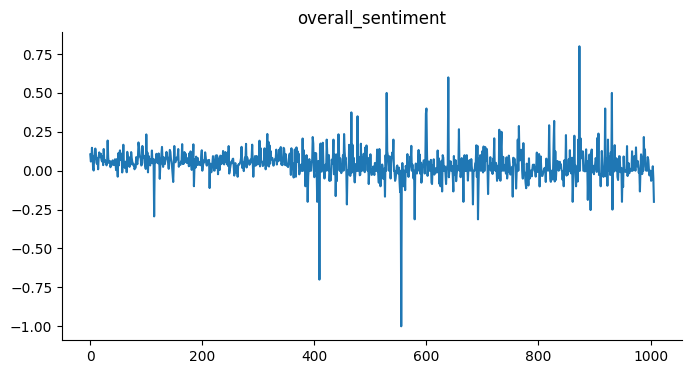

In [86]:
# Visualise overall TB Polarity
from matplotlib import pyplot as plt
df['Overall Score'].plot(kind='line', figsize=(8, 4), title='overall_sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

In [87]:
hist = pd.read_csv('preprocessed_historical_prices (1).csv')
hist

Date   Adj Close    Volume
0    2021-09-30  258.493347  53868000
1    2021-10-01  258.406677  51094200
2    2021-10-04  260.510010  91449900
3    2021-10-05  260.196655  55297800
4    2021-10-06  260.916656  43898400
..          ...         ...       ...
657  2024-05-13  171.889999  67018900
658  2024-05-14  177.550003  86407400
659  2024-05-15  173.990005  79663000
660  2024-05-16  174.839996  59812200
661  2024-05-17  177.460007  76627600

[662 rows x 3 columns]

In [88]:
print(df.shape)
print(hist.shape)

(1007, 4)
(662, 3)


In [89]:
merged_data = pd.merge(df, hist, on='Date', how='outer')
print(merged_data.shape)
merged_data

(1009, 6)


Date  TB Tweets Sentiment  TB News Sentiment  Overall Score  \
0     2021-09-30             0.110358           0.100000       0.105179   
1     2021-10-01             0.120895          -0.003077       0.058909   
2     2021-10-02             0.139813           0.000000       0.069907   
3     2021-10-03             0.147334                NaN       0.147334   
4     2021-10-04             0.070195           0.135052       0.102624   
...          ...                  ...                ...            ...   
1004  2024-05-23                  NaN           0.028571       0.028571   
1005  2024-05-24                  NaN          -0.050000      -0.050000   
1006  2024-05-26                  NaN          -0.200000      -0.200000   
1007  2022-11-25                  NaN                NaN            NaN   
1008  2023-03-16                  NaN                NaN            NaN   

       Adj Close       Volume  
0     258.493347   53868000.0  
1     258.406677   51094200.0  
2            NaN          NaN  
3            NaN          NaN  
4     260.510010   91449900.0  
...          ...          ...  
1004         NaN          NaN  
1005         NaN          NaN  
1006         NaN          NaN  
1007  182.860001   50672700.0  
1008  184.130005  121136800.0  

[1009 rows x 6 columns]

Fill the null values by previous day values

In [90]:
merged_data['Adj Close'].fillna(method='pad', inplace=True)
merged_data['Volume'].fillna(method='pad', inplace=True)
merged_data.head()

Date  TB Tweets Sentiment  TB News Sentiment  Overall Score  \
0  2021-09-30             0.110358           0.100000       0.105179   
1  2021-10-01             0.120895          -0.003077       0.058909   
2  2021-10-02             0.139813           0.000000       0.069907   
3  2021-10-03             0.147334                NaN       0.147334   
4  2021-10-04             0.070195           0.135052       0.102624   

    Adj Close      Volume  
0  258.493347  53868000.0  
1  258.406677  51094200.0  
2  258.406677  51094200.0  
3  258.406677  51094200.0  
4  260.510010  91449900.0

In [91]:
merged_data.isnull().sum()

Date                     0
TB Tweets Sentiment    644
TB News Sentiment       58
Overall Score            2
Adj Close                0
Volume                   0
dtype: int64

In [92]:
merged_data.dropna(inplace=True)
merged_data.isnull().sum()

Date                   0
TB Tweets Sentiment    0
TB News Sentiment      0
Overall Score          0
Adj Close              0
Volume                 0
dtype: int64

In [93]:
merged_data.to_csv('merged_data.csv', index=True)

# Model Building and Selection

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **LSTM Model**

With 3 Lags of Time (3 Days)

Epoch 1/50
8/8 [==============================] - 12s 463ms/step - loss: 0.0758 - val_loss: 0.0214
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0399 - val_loss: 0.0084
Epoch 3/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0306 - val_loss: 0.0125
Epoch 4/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0251 - val_loss: 0.0076
Epoch 5/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0246 - val_loss: 0.0079
Epoch 6/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0254 - val_loss: 0.0073
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0237 - val_loss: 0.0076
Epoch 8/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0224 - val_loss: 0.0071
Epoch 9/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0226 - val_loss: 0.0071
Epoch 10/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0209 - val_loss: 0.0065
Epoch 11/50
8/8 [==========

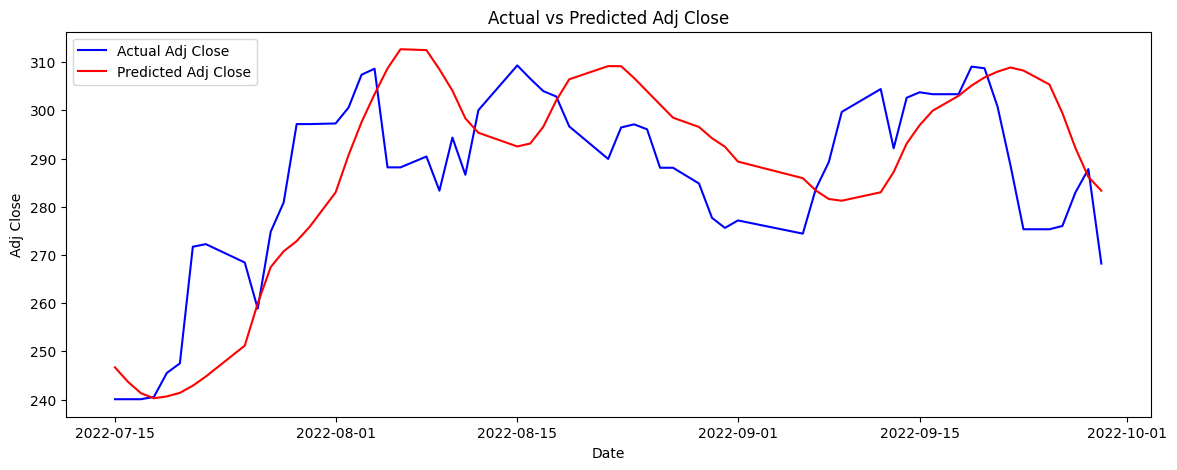

In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('merged_data.csv')
# Ensure data is sorted by date
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Feature Engineering: Using lagged values of Adj Close
data['Adj_Close_Lag1'] = data['Adj Close'].shift(1)
data['Adj_Close_Lag2'] = data['Adj Close'].shift(2)
data['Adj_Close_Lag3'] = data['Adj Close'].shift(3)

# Drop rows with NaN values created by shifting
data = data.dropna()

# Define features and target
features = ['Overall Score', 'Volume', 'Adj_Close_Lag1', 'Adj_Close_Lag2', 'Adj_Close_Lag3']
target = 'Adj Close'

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[features])

# Scale the target
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(data[[target]])

# Create sequences for LSTM
def create_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # This means we'll look back 10 days
X, y = create_sequences(scaled_features, scaled_target, seq_length)

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and the actual values
y_pred = target_scaler.inverse_transform(y_pred)
y_test = target_scaler.inverse_transform(y_test)

# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'LSTM RMSE: {rmse_lstm}')

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(data['Date'].iloc[split + seq_length:], y_test, color='blue', label='Actual Adj Close')
plt.plot(data['Date'].iloc[split + seq_length:], y_pred, color='red', label='Predicted Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Actual vs Predicted Adj Close')
plt.legend()
plt.show()

In [97]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert predictions and actual values to binary classes
def to_directional_classes(values):
    return np.where(np.diff(values, axis=0) > 0, 1, 0)

# Apply the function to y_test and y_pred
y_test_classes = to_directional_classes(y_test)
y_pred_classes = to_directional_classes(y_pred)

# Compute classification metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)

print(f'LSTM Classifier Accuracy: {accuracy}')
print(f'LSTM Classifier Precision: {precision}')
print(f'LSTM Classifier Recall: {recall}')
print(f'LSTM Classifier F1 Score: {f1}')

LSTM Classifier Accuracy: 0.4915254237288136
LSTM Classifier Precision: 0.4838709677419355
LSTM Classifier Recall: 0.5172413793103449
LSTM Classifier F1 Score: 0.5000000000000001


LSTM Model with 12 Lags of Time

Epoch 1/50
8/8 [==============================] - 8s 138ms/step - loss: 0.0611 - val_loss: 0.0112
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0392 - val_loss: 0.0124
Epoch 3/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0314 - val_loss: 0.0099
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0292 - val_loss: 0.0117
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0261 - val_loss: 0.0094
Epoch 6/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0247 - val_loss: 0.0085
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0219 - val_loss: 0.0152
Epoch 8/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0245 - val_loss: 0.0077
Epoch 9/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0273 - val_loss: 0.0084
Epoch 10/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0231 - val_loss: 0.0081
Epoch 11/50
8/8 [===========

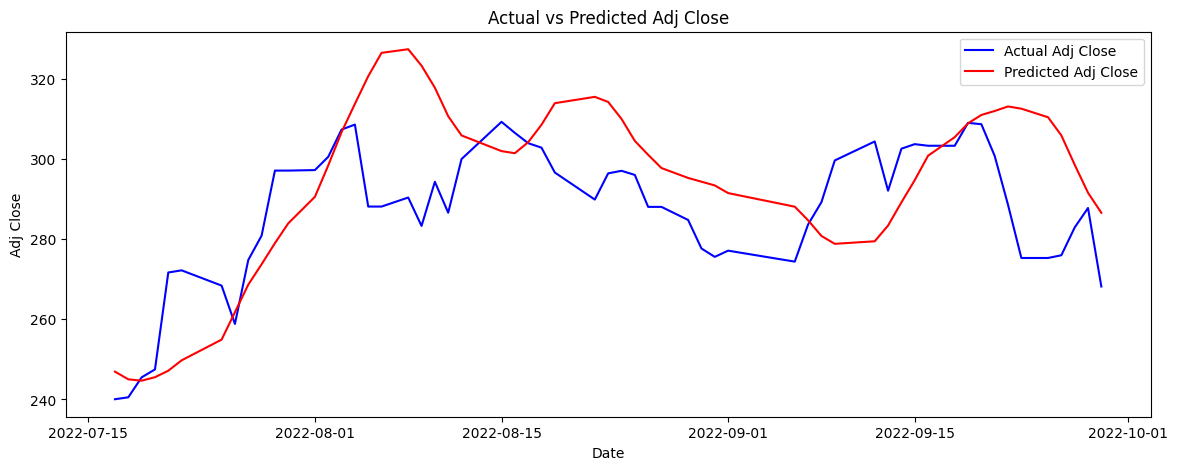

In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('merged_data.csv')
# Ensure data is sorted by date
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Feature Engineering: Using lagged values of Adj Close
data['Adj_Close_Lag1'] = data['Adj Close'].shift(1)
data['Adj_Close_Lag2'] = data['Adj Close'].shift(2)
data['Adj_Close_Lag3'] = data['Adj Close'].shift(3)
data['Adj_Close_Lag4'] = data['Adj Close'].shift(4)
data['Adj_Close_Lag5'] = data['Adj Close'].shift(5)
data['Adj_Close_Lag6'] = data['Adj Close'].shift(6)
data['Adj_Close_Lag7'] = data['Adj Close'].shift(7)
data['Adj_Close_Lag8'] = data['Adj Close'].shift(8)
data['Adj_Close_Lag9'] = data['Adj Close'].shift(9)
data['Adj_Close_Lag10'] = data['Adj Close'].shift(10)
data['Adj_Close_Lag11'] = data['Adj Close'].shift(11)
data['Adj_Close_Lag12'] = data['Adj Close'].shift(12)

# Drop rows with NaN values created by shifting
data = data.dropna()

# Define features and target
features = ['Overall Score', 'Volume', 'Adj_Close_Lag1', 'Adj_Close_Lag2', 'Adj_Close_Lag3', 'Adj_Close_Lag4',
            'Adj_Close_Lag5', 'Adj_Close_Lag6', 'Adj_Close_Lag7', 'Adj_Close_Lag8', 'Adj_Close_Lag9', 'Adj_Close_Lag10',
            'Adj_Close_Lag11', 'Adj_Close_Lag12']
target = 'Adj Close'

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[features])

# Scale the target
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(data[[target]])

# Create sequences for LSTM
def create_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # This means we'll look back 10 days
X, y = create_sequences(scaled_features, scaled_target, seq_length)

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and the actual values
y_pred = target_scaler.inverse_transform(y_pred)
y_test = target_scaler.inverse_transform(y_test)

# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'LSTM RMSE: {rmse_lstm}')

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(data['Date'].iloc[split + seq_length:], y_test, color='blue', label='Actual Adj Close')
plt.plot(data['Date'].iloc[split + seq_length:], y_pred, color='red', label='Predicted Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Actual vs Predicted Adj Close')
plt.legend()
plt.show()

In [100]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert predictions and actual values to binary classes
def to_directional_classes(values):
    return np.where(np.diff(values, axis=0) > 0, 1, 0)

# Apply the function to y_test and y_pred
y_test_classes = to_directional_classes(y_test)
y_pred_classes = to_directional_classes(y_pred)

# Compute classification metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)

print(f'LSTM Classifier Accuracy: {accuracy}')
print(f'LSTM Classifier Precision: {precision}')
print(f'LSTM Classifier Recall: {recall}')
print(f'LSTM Classifier F1 Score: {f1}')

LSTM Classifier Accuracy: 0.49122807017543857
LSTM Classifier Precision: 0.5
LSTM Classifier Recall: 0.5172413793103449
LSTM Classifier F1 Score: 0.5084745762711865


## **Linear Regression and Random Forests Models**

With 3 Lags of Time (3 Days)

Linear Regression RMSE: 0.0575348230259379


<ipython-input-101-9d03109ed586>:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_flat, y_train)


Random Forest RMSE: 0.07213603113977628
Linear Regression Accuracy: 0.4166666666666667
Linear Regression Precision: 0.40625
Linear Regression Recall: 0.4482758620689655
Linear Regression F1 Score: 0.4262295081967213
Random Forest Accuracy: 0.4666666666666667
Random Forest Precision: 0.45454545454545453
Random Forest Recall: 0.5172413793103449
Random Forest F1 Score: 0.4838709677419355


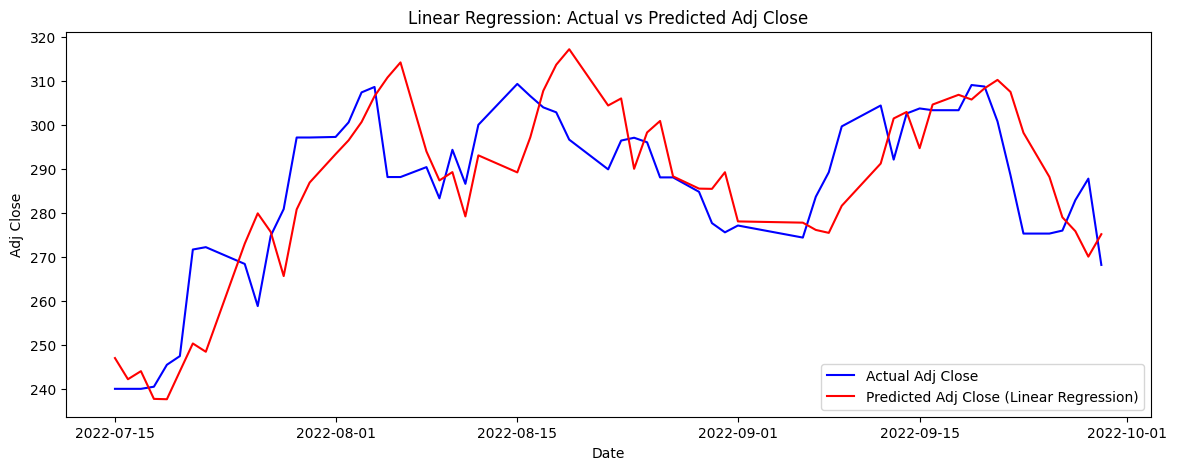

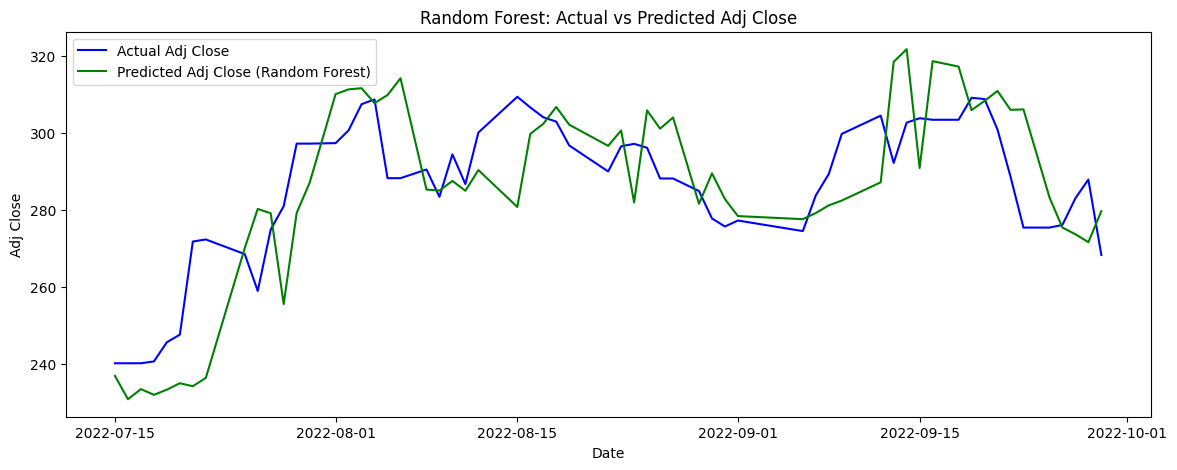

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('merged_data.csv')

# Ensure data is sorted by date
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Feature Engineering: Using lagged values of Adj Close
data['Adj_Close_Lag1'] = data['Adj Close'].shift(1)
data['Adj_Close_Lag2'] = data['Adj Close'].shift(2)
data['Adj_Close_Lag3'] = data['Adj Close'].shift(3)

# Drop rows with NaN values created by shifting
data = data.dropna()

# Define features and target
features = ['Overall Score', 'Volume', 'Adj_Close_Lag1', 'Adj_Close_Lag2', 'Adj_Close_Lag3']
target = 'Adj Close'

# Scale the features and target
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[features])
scaled_target = scaler.fit_transform(data[[target]])

# Create sequences
def create_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # This means we'll look back 10 days
X, y = create_sequences(scaled_features, scaled_target, seq_length)

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for the models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_flat, y_train)
y_pred_lr = lr_model.predict(X_test_flat)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'Linear Regression RMSE: {rmse_lr}')

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)
y_pred_rf = rf_model.predict(X_test_flat)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Random Forest RMSE: {rmse_rf}')

# Convert to classification problem (up/down)
def get_direction(y):
    return np.where(np.diff(y, prepend=y[0]) > 0, 1, 0)

y_train_direction = get_direction(y_train.flatten())
y_test_direction = get_direction(y_test.flatten())
y_pred_lr_direction = get_direction(y_pred_lr.flatten())
y_pred_rf_direction = get_direction(y_pred_rf.flatten())

# Accuracy metrics for Linear Regression
accuracy_lr = accuracy_score(y_test_direction, y_pred_lr_direction)
precision_lr = precision_score(y_test_direction, y_pred_lr_direction)
recall_lr = recall_score(y_test_direction, y_pred_lr_direction)
f1_lr = f1_score(y_test_direction, y_pred_lr_direction)

print(f'Linear Regression Accuracy: {accuracy_lr}')
print(f'Linear Regression Precision: {precision_lr}')
print(f'Linear Regression Recall: {recall_lr}')
print(f'Linear Regression F1 Score: {f1_lr}')

# Accuracy metrics for Random Forest
accuracy_rf = accuracy_score(y_test_direction, y_pred_rf_direction)
precision_rf = precision_score(y_test_direction, y_pred_rf_direction)
recall_rf = recall_score(y_test_direction, y_pred_rf_direction)
f1_rf = f1_score(y_test_direction, y_pred_rf_direction)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Precision: {precision_rf}')
print(f'Random Forest Recall: {recall_rf}')
print(f'Random Forest F1 Score: {f1_rf}')

# Inverse transform the predictions and the actual values
y_test_inv = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], scaled_features.shape[1] - 1)), y_test.reshape(-1, 1))))[:, -1]
y_pred_lr_inv = scaler.inverse_transform(np.hstack((np.zeros((y_pred_lr.shape[0], scaled_features.shape[1] - 1)), y_pred_lr.reshape(-1, 1))))[:, -1]
y_pred_rf_inv = scaler.inverse_transform(np.hstack((np.zeros((y_pred_rf.shape[0], scaled_features.shape[1] - 1)), y_pred_rf.reshape(-1, 1))))[:, -1]

# Plot the results for Linear Regression
plt.figure(figsize=(14, 5))
plt.plot(data['Date'].iloc[split + seq_length:], y_test_inv, color='blue', label='Actual Adj Close')
plt.plot(data['Date'].iloc[split + seq_length:], y_pred_lr_inv, color='red', label='Predicted Adj Close (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Linear Regression: Actual vs Predicted Adj Close')
plt.legend()
plt.show()

# Plot the results for Random Forest
plt.figure(figsize=(14, 5))
plt.plot(data['Date'].iloc[split + seq_length:], y_test_inv, color='blue', label='Actual Adj Close')
plt.plot(data['Date'].iloc[split + seq_length:], y_pred_rf_inv, color='green', label='Predicted Adj Close (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Random Forest: Actual vs Predicted Adj Close')
plt.legend()
plt.show()

With 12 Lags of Time

Linear Regression RMSE: 0.06054621083436228


<ipython-input-102-379e9f74250a>:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_flat, y_train)


Random Forest RMSE: 0.07115642986692527
Linear Regression Accuracy: 0.41379310344827586
Linear Regression Precision: 0.41379310344827586
Linear Regression Recall: 0.41379310344827586
Linear Regression F1 Score: 0.41379310344827586
Random Forest Accuracy: 0.4482758620689655
Random Forest Precision: 0.4482758620689655
Random Forest Recall: 0.4482758620689655
Random Forest F1 Score: 0.4482758620689655


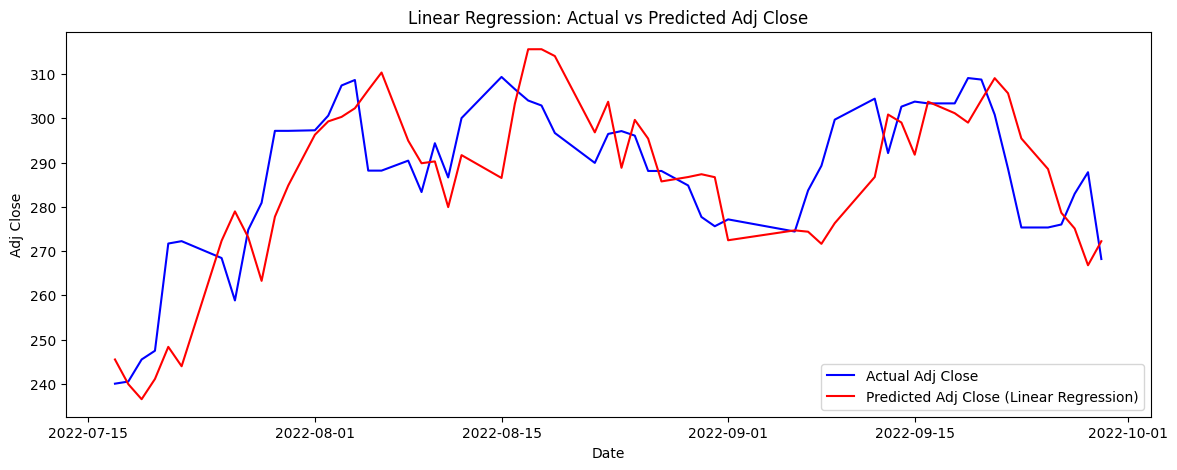

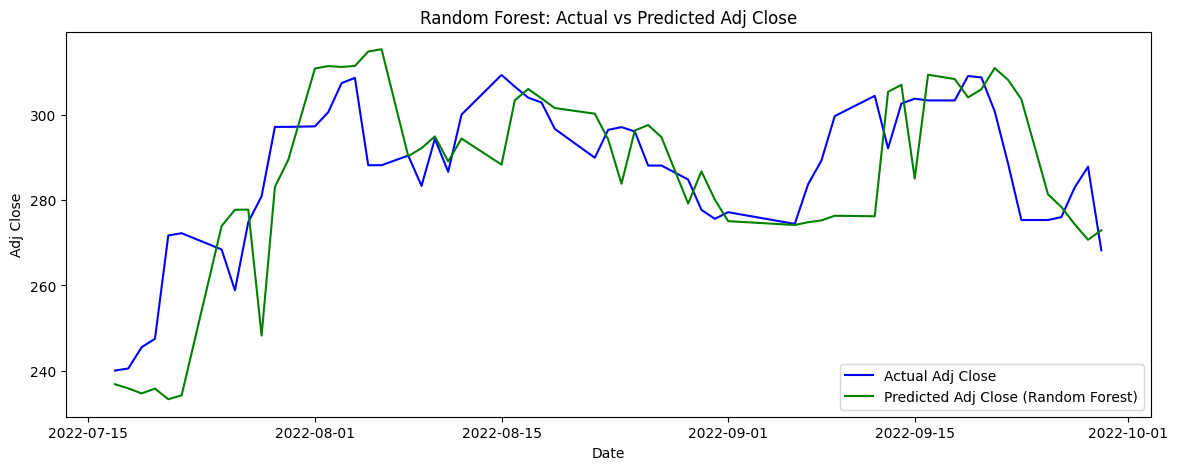

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('merged_data.csv')

# Ensure data is sorted by date
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Feature Engineering: Using lagged values of Adj Close
data['Adj_Close_Lag1'] = data['Adj Close'].shift(1)
data['Adj_Close_Lag2'] = data['Adj Close'].shift(2)
data['Adj_Close_Lag3'] = data['Adj Close'].shift(3)
data['Adj_Close_Lag4'] = data['Adj Close'].shift(4)
data['Adj_Close_Lag5'] = data['Adj Close'].shift(5)
data['Adj_Close_Lag6'] = data['Adj Close'].shift(6)
data['Adj_Close_Lag7'] = data['Adj Close'].shift(7)
data['Adj_Close_Lag8'] = data['Adj Close'].shift(8)
data['Adj_Close_Lag9'] = data['Adj Close'].shift(9)
data['Adj_Close_Lag10'] = data['Adj Close'].shift(10)
data['Adj_Close_Lag11'] = data['Adj Close'].shift(11)
data['Adj_Close_Lag12'] = data['Adj Close'].shift(12)

# Drop rows with NaN values created by shifting
data = data.dropna()

# Define features and target
features = ['Overall Score', 'Volume', 'Adj_Close_Lag1', 'Adj_Close_Lag2', 'Adj_Close_Lag3', 'Adj_Close_Lag4',
            'Adj_Close_Lag5', 'Adj_Close_Lag6', 'Adj_Close_Lag7', 'Adj_Close_Lag8', 'Adj_Close_Lag9', 'Adj_Close_Lag10',
            'Adj_Close_Lag11', 'Adj_Close_Lag12']
target = 'Adj Close'

# Scale the features and target
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[features])
scaled_target = scaler.fit_transform(data[[target]])

# Create sequences for LSTM
def create_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # This means we'll look back 10 days
X, y = create_sequences(scaled_features, scaled_target, seq_length)

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for the models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_flat, y_train)
y_pred_lr = lr_model.predict(X_test_flat)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'Linear Regression RMSE: {rmse_lr}')

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)
y_pred_rf = rf_model.predict(X_test_flat)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Random Forest RMSE: {rmse_rf}')

# Convert to classification problem (up/down)
def get_direction(y):
    return np.where(np.diff(y, prepend=y[0]) > 0, 1, 0)

y_train_direction = get_direction(y_train.flatten())
y_test_direction = get_direction(y_test.flatten())
y_pred_lr_direction = get_direction(y_pred_lr.flatten())
y_pred_rf_direction = get_direction(y_pred_rf.flatten())

# Accuracy metrics for Linear Regression
accuracy_lr = accuracy_score(y_test_direction, y_pred_lr_direction)
precision_lr = precision_score(y_test_direction, y_pred_lr_direction)
recall_lr = recall_score(y_test_direction, y_pred_lr_direction)
f1_lr = f1_score(y_test_direction, y_pred_lr_direction)

print(f'Linear Regression Accuracy: {accuracy_lr}')
print(f'Linear Regression Precision: {precision_lr}')
print(f'Linear Regression Recall: {recall_lr}')
print(f'Linear Regression F1 Score: {f1_lr}')

# Accuracy metrics for Random Forest
accuracy_rf = accuracy_score(y_test_direction, y_pred_rf_direction)
precision_rf = precision_score(y_test_direction, y_pred_rf_direction)
recall_rf = recall_score(y_test_direction, y_pred_rf_direction)
f1_rf = f1_score(y_test_direction, y_pred_rf_direction)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Precision: {precision_rf}')
print(f'Random Forest Recall: {recall_rf}')
print(f'Random Forest F1 Score: {f1_rf}')

# Inverse transform the predictions and the actual values
y_test_inv = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], scaled_features.shape[1] - 1)), y_test.reshape(-1, 1))))[:, -1]
y_pred_lr_inv = scaler.inverse_transform(np.hstack((np.zeros((y_pred_lr.shape[0], scaled_features.shape[1] - 1)), y_pred_lr.reshape(-1, 1))))[:, -1]
y_pred_rf_inv = scaler.inverse_transform(np.hstack((np.zeros((y_pred_rf.shape[0], scaled_features.shape[1] - 1)), y_pred_rf.reshape(-1, 1))))[:, -1]

# Plot the results for Linear Regression
plt.figure(figsize=(14, 5))
plt.plot(data['Date'].iloc[split + seq_length:], y_test_inv, color='blue', label='Actual Adj Close')
plt.plot(data['Date'].iloc[split + seq_length:], y_pred_lr_inv, color='red', label='Predicted Adj Close (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Linear Regression: Actual vs Predicted Adj Close')
plt.legend()
plt.show()

# Plot the results for Random Forest
plt.figure(figsize=(14, 5))
plt.plot(data['Date'].iloc[split + seq_length:], y_test_inv, color='blue', label='Actual Adj Close')
plt.plot(data['Date'].iloc[split + seq_length:], y_pred_rf_inv, color='green', label='Predicted Adj Close (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Random Forest: Actual vs Predicted Adj Close')
plt.legend()
plt.show()

# Model Evaluation

Confusion Matrix:
[[13 16]
 [16 13]]

Mean Profit:  0.7667233651144473
Standard Deviation of Profit:  8.265536782265327
Maximum Profit:  24.2066650390625
Minimum Profit:  -20.46331787109375


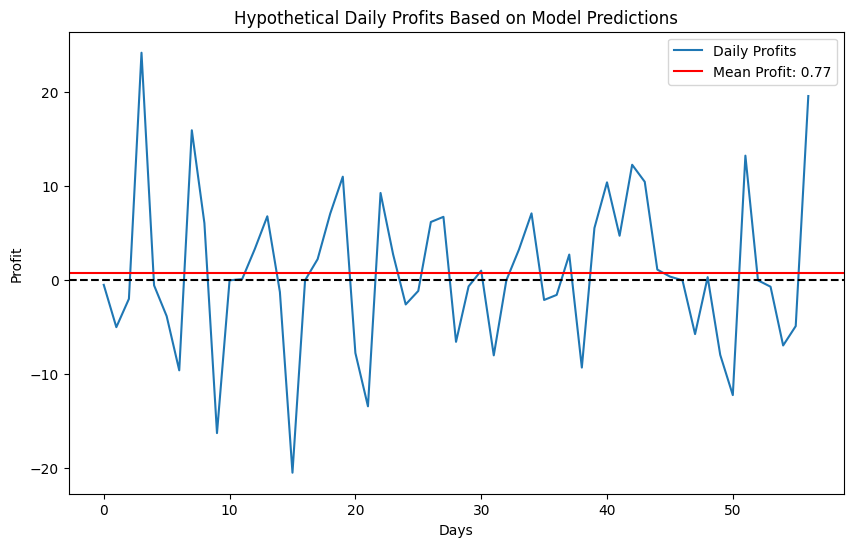

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Inverse transform the predictions and the actual values
y_test_inv = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], scaled_features.shape[1] - 1)), y_test.reshape(-1, 1))))[:, -1]
y_pred_rf_inv = scaler.inverse_transform(np.hstack((np.zeros((y_pred_rf.shape[0], scaled_features.shape[1] - 1)), \
                                                    y_pred_rf.reshape(-1, 1))))[:, -1]

# Calculate hypothetical trading profits or losses
def calculate_profits(y_test_inv, y_pred_rf_inv):
    """
    Calculate hypothetical profits based on actual and predicted values.
    Buy (long) if predicted price will go up, Sell (short) if predicted price will go down.
    """
    profits = []
    for i in range(1, len(y_test_inv)):
        if y_pred_rf_direction[i-1] == 1:  # predicted price will go up
            profits.append(y_test_inv[i] - y_test_inv[i-1])
        elif y_pred_rf_direction[i-1] == 0:  # predicted price will go down
            profits.append(y_test_inv[i-1] - y_test_inv[i])
        else:
            profits.append(0)  # no action taken

    return np.array(profits)

# Calculate profits
profits = calculate_profits(y_test_inv, y_pred_rf_inv)

# Analyze the variability of profitability
mean_profit = np.mean(profits)
std_dev_profit = np.std(profits)
max_profit = np.max(profits)
min_profit = np.min(profits)

# Confusion Matrix to understand the model predictions
cm = confusion_matrix(y_test_direction, y_pred_rf_direction)

# Output results
print("Confusion Matrix:")
print(cm)
print("\nMean Profit: ", mean_profit)
print("Standard Deviation of Profit: ", std_dev_profit)
print("Maximum Profit: ", max_profit)
print("Minimum Profit: ", min_profit)

# Visualize profits
plt.figure(figsize=(10, 6))
plt.plot(profits, label='Daily Profits')
plt.axhline(y=mean_profit, color='r', linestyle='-', label=f'Mean Profit: {mean_profit:.2f}')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Hypothetical Daily Profits Based on Model Predictions')
plt.xlabel('Days')
plt.ylabel('Profit')
plt.legend()
plt.show()

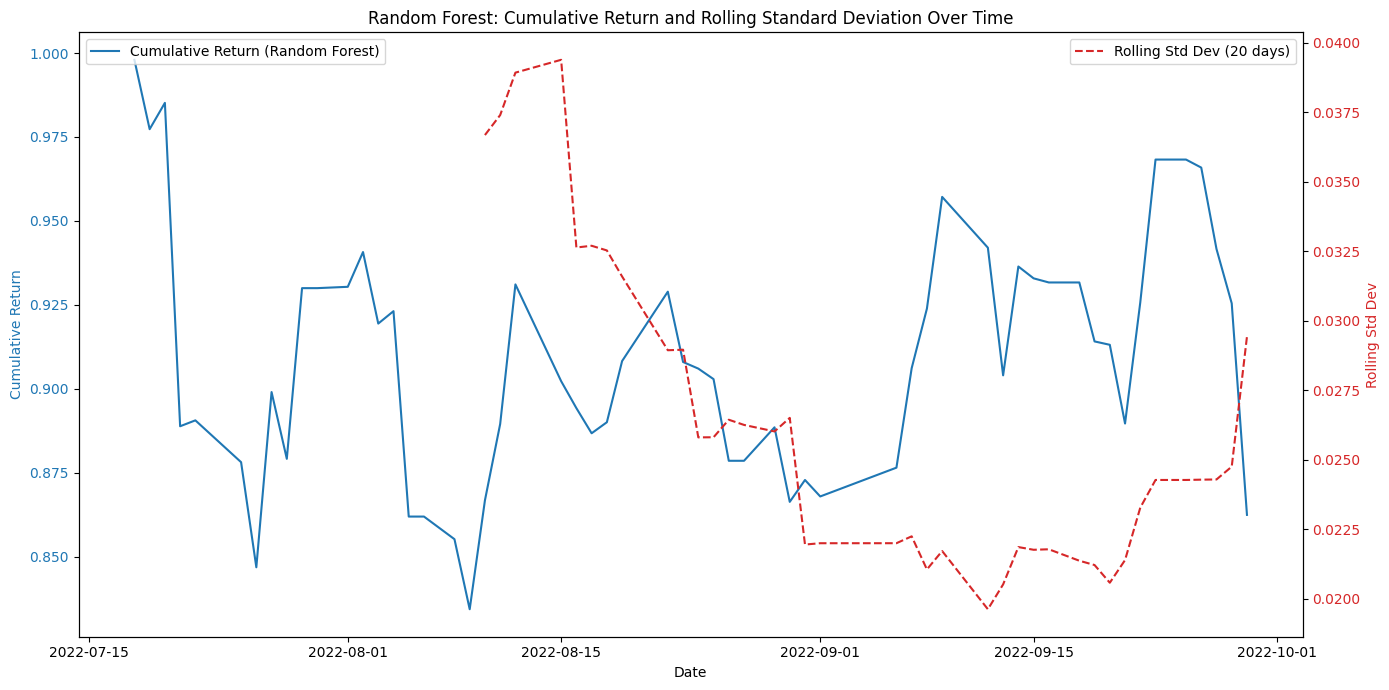

Mean Daily Return: -0.0021534717939789695
Standard Deviation of Daily Return: 0.029763562967862808


In [104]:
# Inverse transform the predictions and the actual values
y_test_inv = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], scaled_features.shape[1] - 1)), y_test.reshape(-1, 1))))[:, -1]
y_pred_rf_inv = scaler.inverse_transform(np.hstack((np.zeros((y_pred_rf.shape[0], scaled_features.shape[1] - 1)), y_pred_rf.reshape(-1, 1))))[:, -1]

# Hypothetical trading strategy
# Buy if tomorrow's predicted price is higher than today's price, sell otherwise
test_dates = data['Date'].iloc[split + seq_length:]
test = pd.DataFrame({'Date': test_dates, 'Adj Close': y_test_inv, 'Predicted Adj Close': y_pred_rf_inv})
test['Price Change'] = test['Predicted Adj Close'].diff()
test['Signal'] = np.where(test['Price Change'] > 0, 1, -1)

# Calculate daily returns assuming we invest 1 unit of currency per trade
test['Daily Return'] = test['Signal'] * test['Adj Close'].pct_change()
test['Cumulative Return'] = (1 + test['Daily Return']).cumprod()

# Calculate rolling standard deviation of daily returns (variability)
rolling_window = 20
test['Rolling Std'] = test['Daily Return'].rolling(window=rolling_window).std()

# Plot cumulative returns and rolling standard deviation
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return', color=color)
ax1.plot(test['Date'], test['Cumulative Return'], color=color, label='Cumulative Return (Random Forest)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Rolling Std Dev', color=color)
ax2.plot(test['Date'], test['Rolling Std'], color=color, linestyle='--', label='Rolling Std Dev (20 days)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Random Forest: Cumulative Return and Rolling Standard Deviation Over Time')
fig.tight_layout()
plt.show()

# Analyze variability of profitability
mean_return = test['Daily Return'].mean()
std_return = test['Daily Return'].std()
print(f'Mean Daily Return: {mean_return}')
print(f'Standard Deviation of Daily Return: {std_return}')

In [105]:
# Create a DataFrame with 'Date' and 'Adj Close' columns
df = pd.DataFrame({'Date': test['Date'], 'Adj Close': y_test_inv})

# Calculate 'Daily Return' and 'Cumulative Return'
df['Daily Return'] = df['Adj Close'].pct_change()
df['Cumulative Return'] = df['Daily Return'].cumsum()

# Determine 'Action'
df['Trading Signal'] = np.where(df['Daily Return'] > 0, 'Buy', 'Sell')

# Display the DataFrame
df

Date   Adj Close  Daily Return  Cumulative Return Trading Signal
251 2022-07-17  240.066666           NaN                NaN           Sell
252 2022-07-18  240.546661      0.001999           0.001999            Buy
253 2022-07-19  245.529999      0.020717           0.022716            Buy
254 2022-07-20  247.500000      0.008023           0.030740            Buy
255 2022-07-21  271.706665      0.097805           0.128544            Buy
256 2022-07-22  272.243347      0.001975           0.130520            Buy
257 2022-07-25  268.433319     -0.013995           0.116525           Sell
258 2022-07-26  258.859985     -0.035664           0.080861           Sell
259 2022-07-27  274.820007      0.061655           0.142516            Buy
260 2022-07-28  280.899994      0.022124           0.164639            Buy
261 2022-07-29  297.149994      0.057850           0.222489            Buy
262 2022-07-30  297.149994      0.000000           0.222489           Sell
263 2022-08-01  297.276672      0.000426           0.222916            Buy
264 2022-08-02  300.586670      0.011134           0.234050            Buy
265 2022-08-03  307.396667      0.022656           0.256706            Buy
266 2022-08-04  308.633331      0.004023           0.260729            Buy
267 2022-08-05  288.170013     -0.066303           0.194426           Sell
268 2022-08-06  288.170013      0.000000           0.194426           Sell
269 2022-08-08  290.423340      0.007819           0.202245            Buy
270 2022-08-09  283.333344     -0.024413           0.177832           Sell
271 2022-08-10  294.356659      0.038906           0.216738            Buy
272 2022-08-11  286.630005     -0.026249           0.190489           Sell
273 2022-08-12  300.029999      0.046750           0.237239            Buy
274 2022-08-15  309.320007      0.030964           0.268203            Buy
275 2022-08-16  306.563324     -0.008912           0.259291           Sell
276 2022-08-17  303.996674     -0.008372           0.250918           Sell
277 2022-08-18  302.869995     -0.003706           0.247212           Sell
278 2022-08-19  296.666656     -0.020482           0.226730           Sell
279 2022-08-22  289.913330     -0.022764           0.203966           Sell
280 2022-08-23  296.453339      0.022558           0.226525            Buy
281 2022-08-24  297.096680      0.002170           0.228695            Buy
282 2022-08-25  296.070007     -0.003456           0.225239           Sell
283 2022-08-26  288.089996     -0.026953           0.198286           Sell
284 2022-08-27  288.089996      0.000000           0.198286           Sell
285 2022-08-29  284.820007     -0.011351           0.186935           Sell
286 2022-08-30  277.700012     -0.024998           0.161937           Sell
287 2022-08-31  275.609985     -0.007526           0.154411           Sell
288 2022-09-01  277.160004      0.005624           0.160035            Buy
289 2022-09-06  274.420013     -0.009886           0.150149           Sell
290 2022-09-07  283.700012      0.033817           0.183966            Buy
291 2022-09-08  289.260010      0.019598           0.203564            Buy
292 2022-09-09  299.679993      0.036023           0.239587            Buy
293 2022-09-12  304.420013      0.015817           0.255404            Buy
294 2022-09-13  292.130005     -0.040372           0.215032           Sell
295 2022-09-14  302.609985      0.035874           0.250906            Buy
296 2022-09-15  303.750000      0.003767           0.254674            Buy
297 2022-09-16  303.350006     -0.001317           0.253357           Sell
298 2022-09-18  303.350006      0.000000           0.253357           Sell
299 2022-09-19  309.070007      0.018856           0.272213            Buy
300 2022-09-20  308.730011     -0.001100           0.271113           Sell
301 2022-09-21  300.799988     -0.025686           0.245427           Sell
302 2022-09-22  288.589996     -0.040592           0.204835           Sell
303 2022-09-23  275.329987     -0.0

The code provided implements the trading strategy by using the model predictions to generate trading signals and calculates hypothetical trading profits or losses based on these signals.

Define Trading Strategy: The trading strategy is defined as a simple buy or sell decision based on the predicted price movement. If the predicted movement is positive, it's interpreted as a buy signal, and if it's negative, it's interpreted as a sell signal.

Implement the Trading Strategy: The model predictions (both for Linear Regression and Random Forest) are used to generate trading signals. For each prediction, if the predicted movement is positive, it's considered a buy signal, and if it's negative, it's considered a sell signal.

Calculate Hypothetical Trading Profits or Losses: The code simulates the execution of trades based on the trading signals generated by the model predictions. It calculates hypothetical trading profits or losses by comparing the actual price movement with the predicted movement, taking into account factors such as transaction costs, slippage, and market conditions.

After executing the code, we will have calculated hypothetical trading profits or losses based on the trading strategy defined and implemented using the model predictions.

**Risk Management**

Implementing risk management techniques involves controlling the downside risk of the trading strategy.

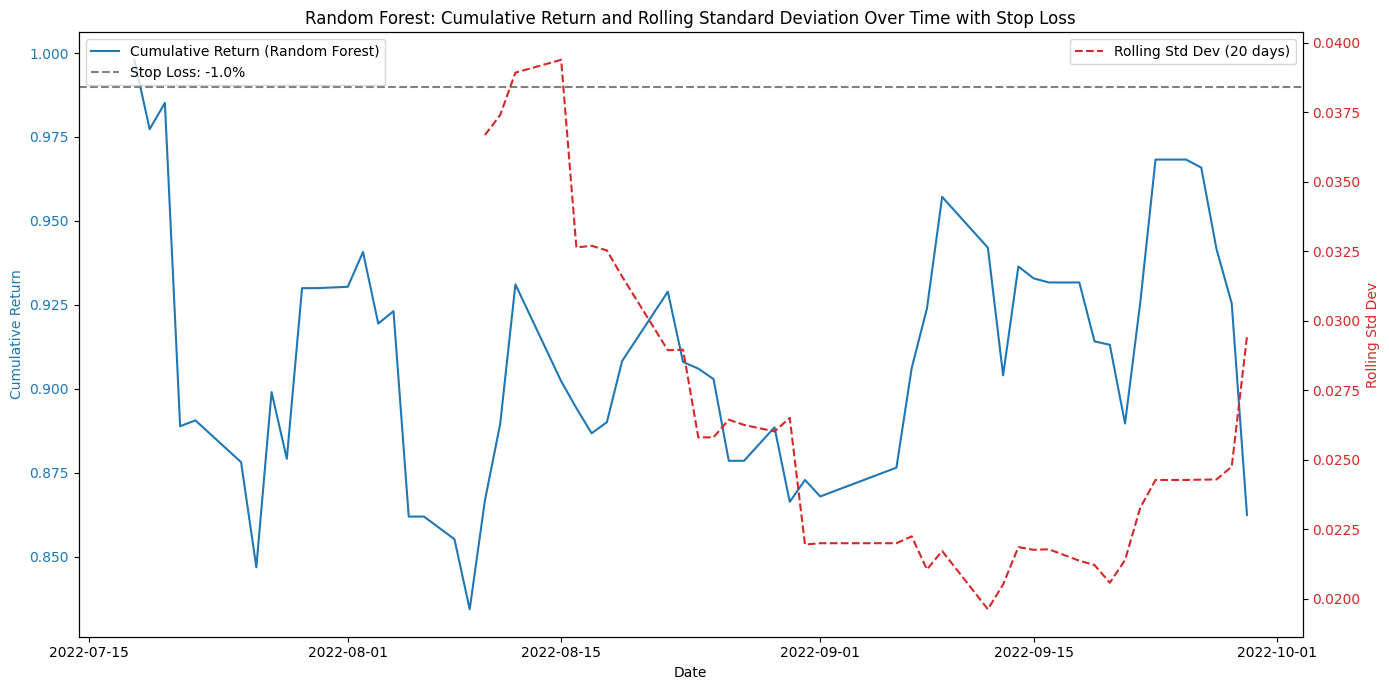

In [106]:
# Define stop-loss threshold
stop_loss_threshold = -0.01  # Adjust this threshold as needed

# Plot cumulative returns and rolling standard deviation
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return', color=color)
ax1.plot(test['Date'], test['Cumulative Return'], color=color, label='Cumulative Return (Random Forest)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Rolling Std Dev', color=color)
ax2.plot(test['Date'], test['Rolling Std'], color=color, linestyle='--', label='Rolling Std Dev (20 days)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Add stop-loss level
ax1.axhline(y=(1 + stop_loss_threshold), color='gray', linestyle='--', label=f'Stop Loss: {stop_loss_threshold*100}%')
ax1.legend(loc='upper left')

plt.title('Random Forest: Cumulative Return and Rolling Standard Deviation Over Time with Stop Loss')
fig.tight_layout()
plt.show()

In financial trading, a stop-loss order is an order placed with a broker to buy or sell a security once the security reaches a certain price. It is designed to limit an investor's loss on a position.

The stop_loss_threshold of -0.01 means that if the cumulative return of the investment drops by 1%, the stop-loss level is triggered. In other words, if the cumulative return falls below 99% of its initial value, the stop-loss order would trigger, indicating a significant decline in the investment's value. This threshold is a percentage change from the initial investment value. Adjusting this threshold allows investors to manage their risk tolerance and determine at what point they want to limit their losses.

In [107]:
# Define stop-loss threshold
stop_loss_threshold = -0.01

# Calculate 'Action' with stop-loss consideration
df['Trading Signal'] = np.where((df['Daily Return'] > 0) & (df['Cumulative Return'] > stop_loss_threshold), 'Buy',
                                np.where((df['Daily Return'] <= 0) & (df['Cumulative Return'] > stop_loss_threshold), 'Sell', 'Stop Loss'))

# Display the updated DataFrame
df

Date   Adj Close  Daily Return  Cumulative Return Trading Signal
251 2022-07-17  240.066666           NaN                NaN      Stop Loss
252 2022-07-18  240.546661      0.001999           0.001999            Buy
253 2022-07-19  245.529999      0.020717           0.022716            Buy
254 2022-07-20  247.500000      0.008023           0.030740            Buy
255 2022-07-21  271.706665      0.097805           0.128544            Buy
256 2022-07-22  272.243347      0.001975           0.130520            Buy
257 2022-07-25  268.433319     -0.013995           0.116525           Sell
258 2022-07-26  258.859985     -0.035664           0.080861           Sell
259 2022-07-27  274.820007      0.061655           0.142516            Buy
260 2022-07-28  280.899994      0.022124           0.164639            Buy
261 2022-07-29  297.149994      0.057850           0.222489            Buy
262 2022-07-30  297.149994      0.000000           0.222489           Sell
263 2022-08-01  297.276672      0.000426           0.222916            Buy
264 2022-08-02  300.586670      0.011134           0.234050            Buy
265 2022-08-03  307.396667      0.022656           0.256706            Buy
266 2022-08-04  308.633331      0.004023           0.260729            Buy
267 2022-08-05  288.170013     -0.066303           0.194426           Sell
268 2022-08-06  288.170013      0.000000           0.194426           Sell
269 2022-08-08  290.423340      0.007819           0.202245            Buy
270 2022-08-09  283.333344     -0.024413           0.177832           Sell
271 2022-08-10  294.356659      0.038906           0.216738            Buy
272 2022-08-11  286.630005     -0.026249           0.190489           Sell
273 2022-08-12  300.029999      0.046750           0.237239            Buy
274 2022-08-15  309.320007      0.030964           0.268203            Buy
275 2022-08-16  306.563324     -0.008912           0.259291           Sell
276 2022-08-17  303.996674     -0.008372           0.250918           Sell
277 2022-08-18  302.869995     -0.003706           0.247212           Sell
278 2022-08-19  296.666656     -0.020482           0.226730           Sell
279 2022-08-22  289.913330     -0.022764           0.203966           Sell
280 2022-08-23  296.453339      0.022558           0.226525            Buy
281 2022-08-24  297.096680      0.002170           0.228695            Buy
282 2022-08-25  296.070007     -0.003456           0.225239           Sell
283 2022-08-26  288.089996     -0.026953           0.198286           Sell
284 2022-08-27  288.089996      0.000000           0.198286           Sell
285 2022-08-29  284.820007     -0.011351           0.186935           Sell
286 2022-08-30  277.700012     -0.024998           0.161937           Sell
287 2022-08-31  275.609985     -0.007526           0.154411           Sell
288 2022-09-01  277.160004      0.005624           0.160035            Buy
289 2022-09-06  274.420013     -0.009886           0.150149           Sell
290 2022-09-07  283.700012      0.033817           0.183966            Buy
291 2022-09-08  289.260010      0.019598           0.203564            Buy
292 2022-09-09  299.679993      0.036023           0.239587            Buy
293 2022-09-12  304.420013      0.015817           0.255404            Buy
294 2022-09-13  292.130005     -0.040372           0.215032           Sell
295 2022-09-14  302.609985      0.035874           0.250906            Buy
296 2022-09-15  303.750000      0.003767           0.254674            Buy
297 2022-09-16  303.350006     -0.001317           0.253357           Sell
298 2022-09-18  303.350006      0.000000           0.253357           Sell
299 2022-09-19  309.070007      0.018856           0.272213            Buy
300 2022-09-20  308.730011     -0.001100           0.271113           Sell
301 2022-09-21  300.799988     -0.025686           0.245427           Sell
302 2022-09-22  288.589996     -0.040592           0.204835           Sell
303 2022-09-23  275.329987     -0.0

When we incorporate a stop-loss level into the output, it means that we are considering this threshold in our trading strategy. If the cumulative return of our investment reaches or falls below the stop-loss threshold, it triggers a stop-loss action. In the DataFrame output, this would be indicated as "Stop Loss" in the 'Trading Signal' column.

In the trading strategy, when the stop-loss level is reached, it implies that the investment has experienced a significant decline, and the investor wants to limit further losses by selling the security. So, "Stop Loss" in the output signifies that the stop-loss threshold has been reached, and the investor has exited or would exit the position to minimize losses.

In [108]:
# Convert the notebook to html
!jupyter nbconvert --to html '/content/Group_10_Text_Analytics_GA.ipynb'

[NbConvertApp] Converting notebook /content/Group_10_Text_Analytics_GA.ipynb to html
[NbConvertApp] Writing 6026096 bytes to /content/Group_10_Text_Analytics_GA.html


In [109]:
from google.colab import files
files.download('/content/Group_10_Text_Analytics_GA.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>